# Data Science Engineering Tools and Methods


how to run? use colab. add the dataset - ckd-dataser-v2.csv. Run all the cells
link: https://colab.research.google.com/drive/1d_lrtuiP7GVSw1cX_3RPzgdLBeItrOr3?usp=sharing

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.0.2
!pip install eli5
!pip install imbalanced-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.



#Risk Factor Prediction of Chronic Kidney Disease based on Machine Learning Algorithms

by Shravan Kumar Sai Prabhakar

**Abstract**: Chronic Kidney Disease (CKD) is a growing global health issue, significantly affecting lives and often leading to severe complications like heart failure.A lack of awareness and healthcare access exacerbates the problem, leading to late diagnoses. Early detection of CKD symptoms is vital to prevent its progression and reduce associated risks. This study leverages machine learning algorithms, including Naïve Bayes, and Logistic Regression, to predict CKD and Linear Regression to analyze risk factors. The aim is to aid doctors in identifying symptoms early, ensuring timely intervention and better health outcomes.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from eli5.sklearn import PermutationImportance
import eli5
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


**1. Import and Examine the Dataset**

    Explanation:
    
        The dataset is loaded using pd.read_csv(), and unnecessary rows are removed to clean the data (df.drop).
        The dataset is then inspected using methods like .head() to understand its structure and validate successful loading.

In [ ]:
df = pd.read_csv("./ckd-dataset-v2.csv")


In [ ]:
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


**Row Drops**: Rows 0 and 1 are dropped as they contain metadata about the columns rather than actual data. While this metadata provides context for the dataset, it is not part of the meaningful data used for analysis or modeling.

In [ ]:

df=df.drop(index=1)
df=df.drop(index=0)

In [ ]:
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
5,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
6,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [ ]:
num_duplicates = df.duplicated().sum()
print("Count of duplicates? ",num_duplicates)

Count of duplicates?  0


In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
bp (Diastolic),0
bp limit,0
sg,0
al,0
class,0
rbc,0
su,0
pc,0
pcc,0
ba,0


**Missing Values:** After examining the dataset, we found no missing values that require handling, ensuring the data is complete and ready for further processing.

**Categorical Columns:** Based on the dataset, certain columns can be identified as categorical labels, representing distinct categories or groups. These columns require encoding to transform them into a numerical format suitable for machine learning models. They are given below

In [ ]:

categorical_columns = [
    'bp (Diastolic)',
    'bp limit',
    'class',
    'rbc',
    'pc',
    'pcc',
    'ba',
    'htn',
    'dm',
    'cad',
    'appet',
    'pe',
    'ane',
    'stage',
    'age',

]
print(len(categorical_columns))

15


**Categorical columns are identified and encoded using astype('category').cat.codes, which converts string values into numerical codes for machine learning.**

In [ ]:
for col in categorical_columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [ ]:
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.019 - 1.021,1 - 1,0,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,0,1,8
3,0,0,1.009 - 1.011,< 0,0,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,0,1,8
4,0,0,1.009 - 1.011,≥ 4,0,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,0,1,8
5,1,1,1.009 - 1.011,3 - 3,0,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,0,1,8
6,0,0,1.015 - 1.017,< 0,0,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,0,1,0




> The code below generates histograms for all categorical columns to visualize their distributions. It calculates the required number of rows and columns for subplots based on the number of categorical columns, ensuring the plots fit neatly within the figure. Each subplot displays the frequency of encoded values for a specific categorical column, providing insights into the distribution of categories. Any unused subplots are removed to maintain a clean layout, and the entire figure is displayed with a tight layout for better readability.



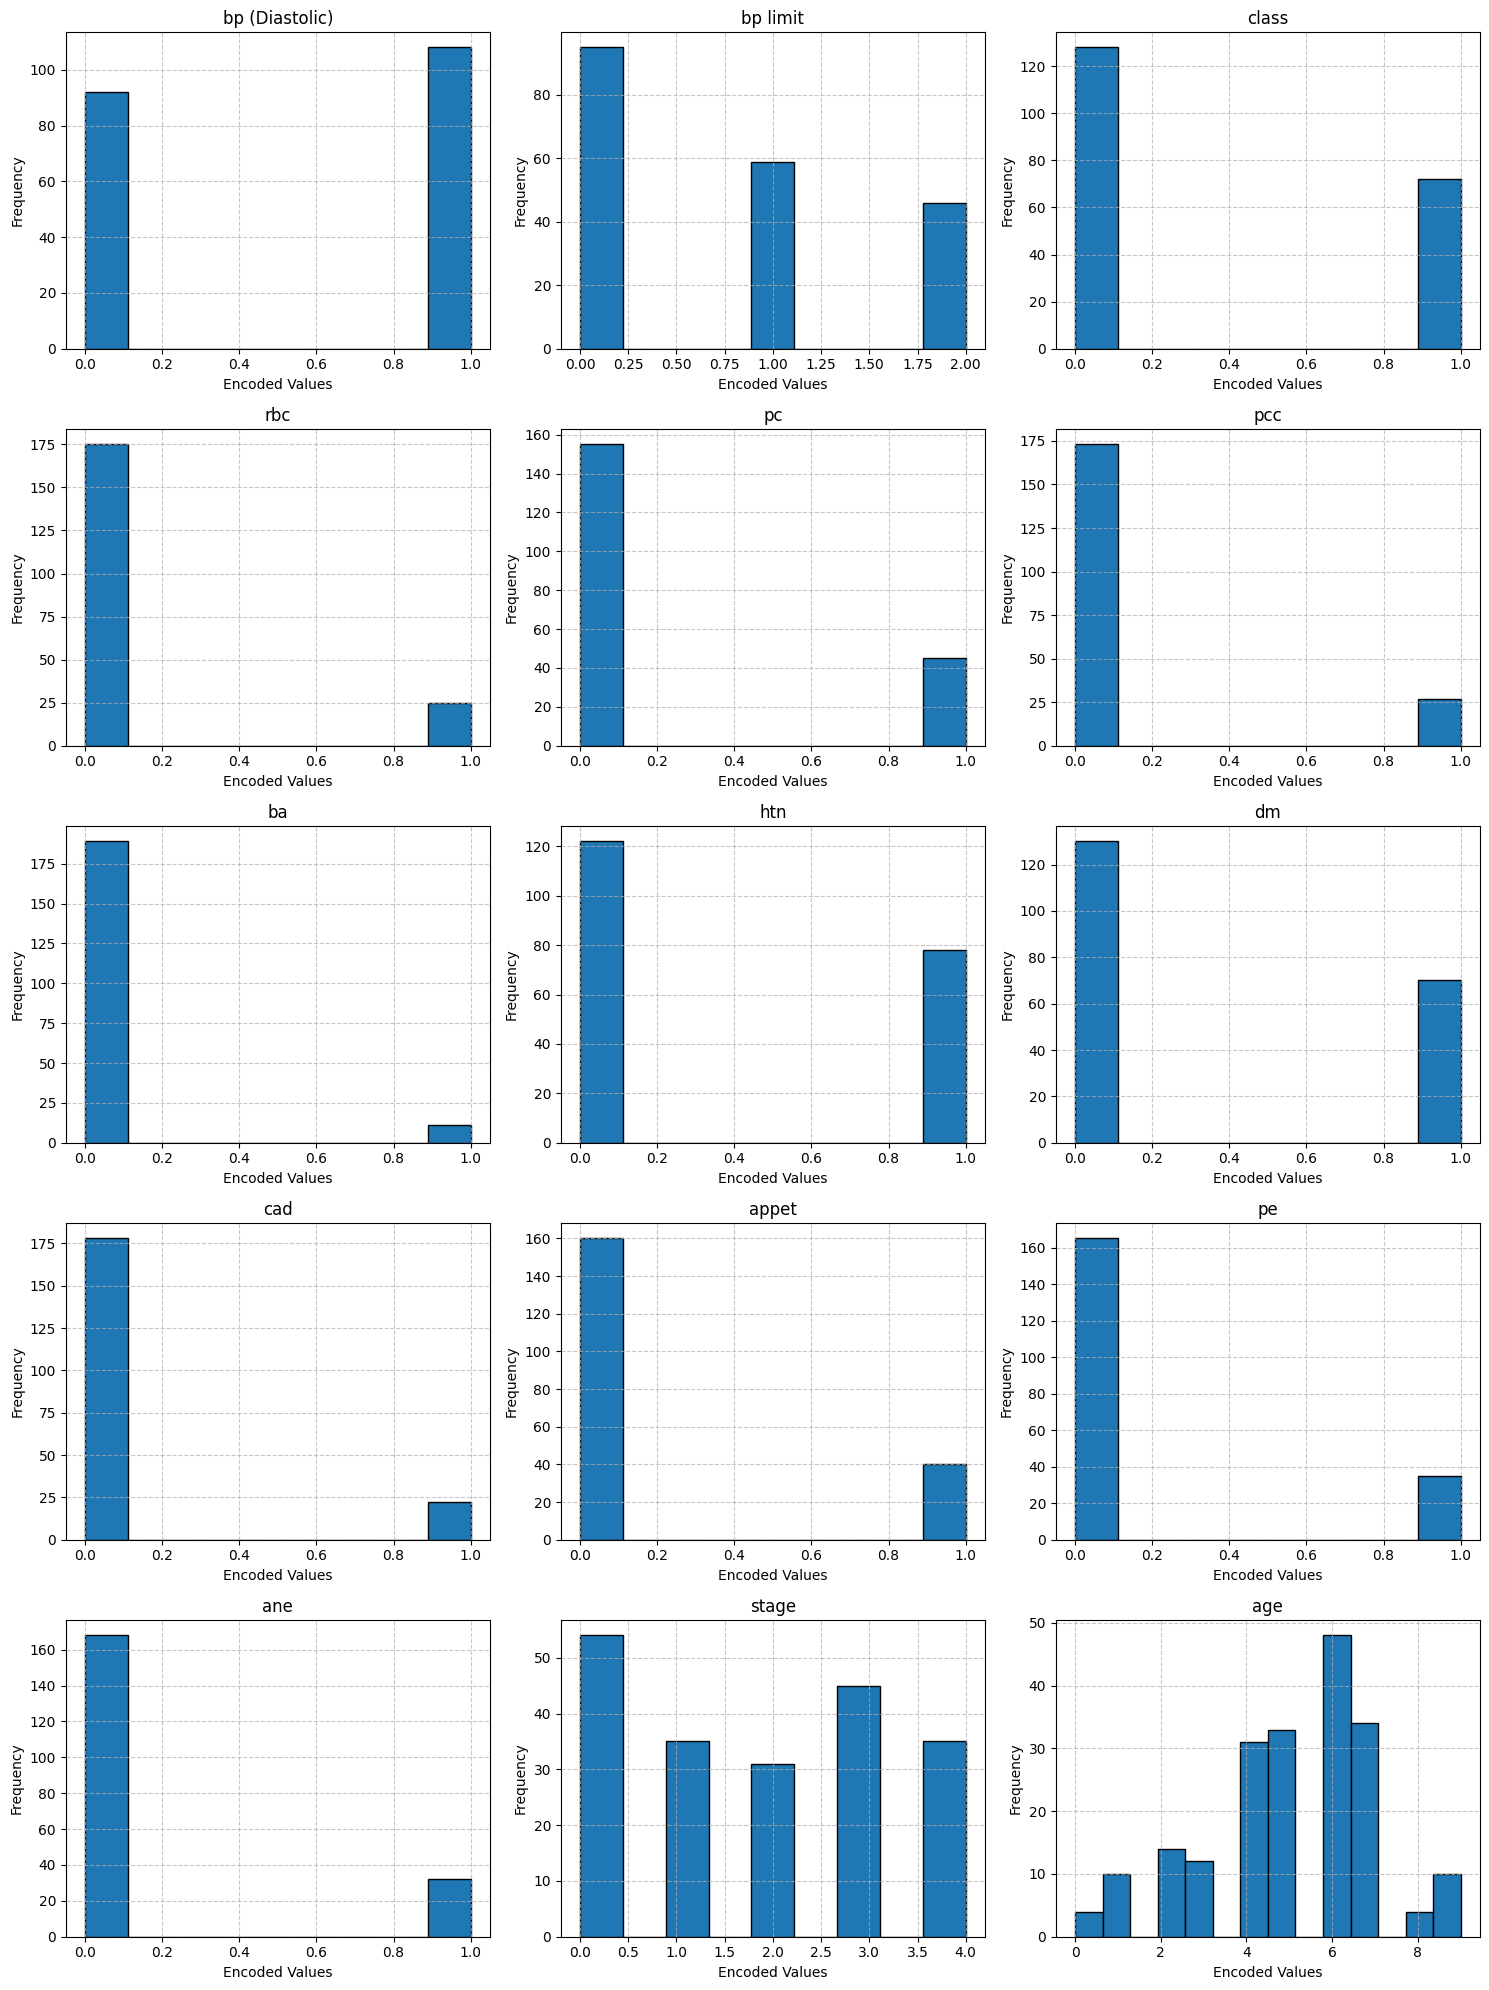

In [ ]:

n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.ravel()


for idx, column in enumerate(categorical_columns):
    axes[idx].hist(df[column], bins='auto', edgecolor='black')
    axes[idx].set_title(column)
    axes[idx].set_xlabel('Encoded Values')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, linestyle='--', alpha=0.7)


for idx in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()

plt.show()

Class Distribution (Counts):
class
0    128
1     72
Name: count, dtype: int64

Class Distribution (Percentages):
class
0    64.0
1    36.0
Name: proportion, dtype: float64


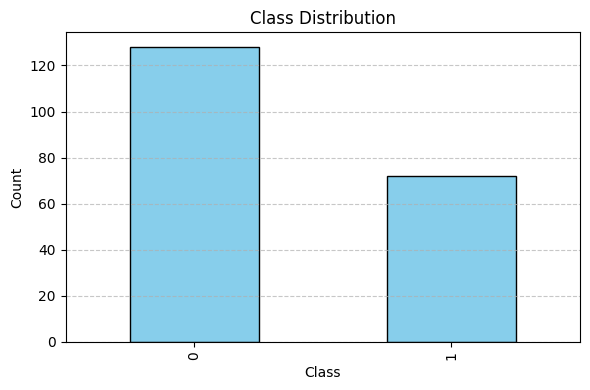

In [ ]:
class_counts = df['class'].value_counts()
class_percentages = df['class'].value_counts(normalize=True) * 100

print("Class Distribution (Counts):")
print(class_counts)

print("\nClass Distribution (Percentages):")
print(class_percentages)

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Mean Encoding:**
This function processes a dataset by applying custom numeric encoding with transformations to clean and standardize numeric columns. It handles string-based numeric ranges (e.g., "10 - 20"), inequalities (<, >, ≥), and special cases, converting them into numeric values. Missing values are imputed using the median of the respective column. After processing, the function visualizes the distributions of all numeric columns with histograms to help identify patterns or anomalies in the data.

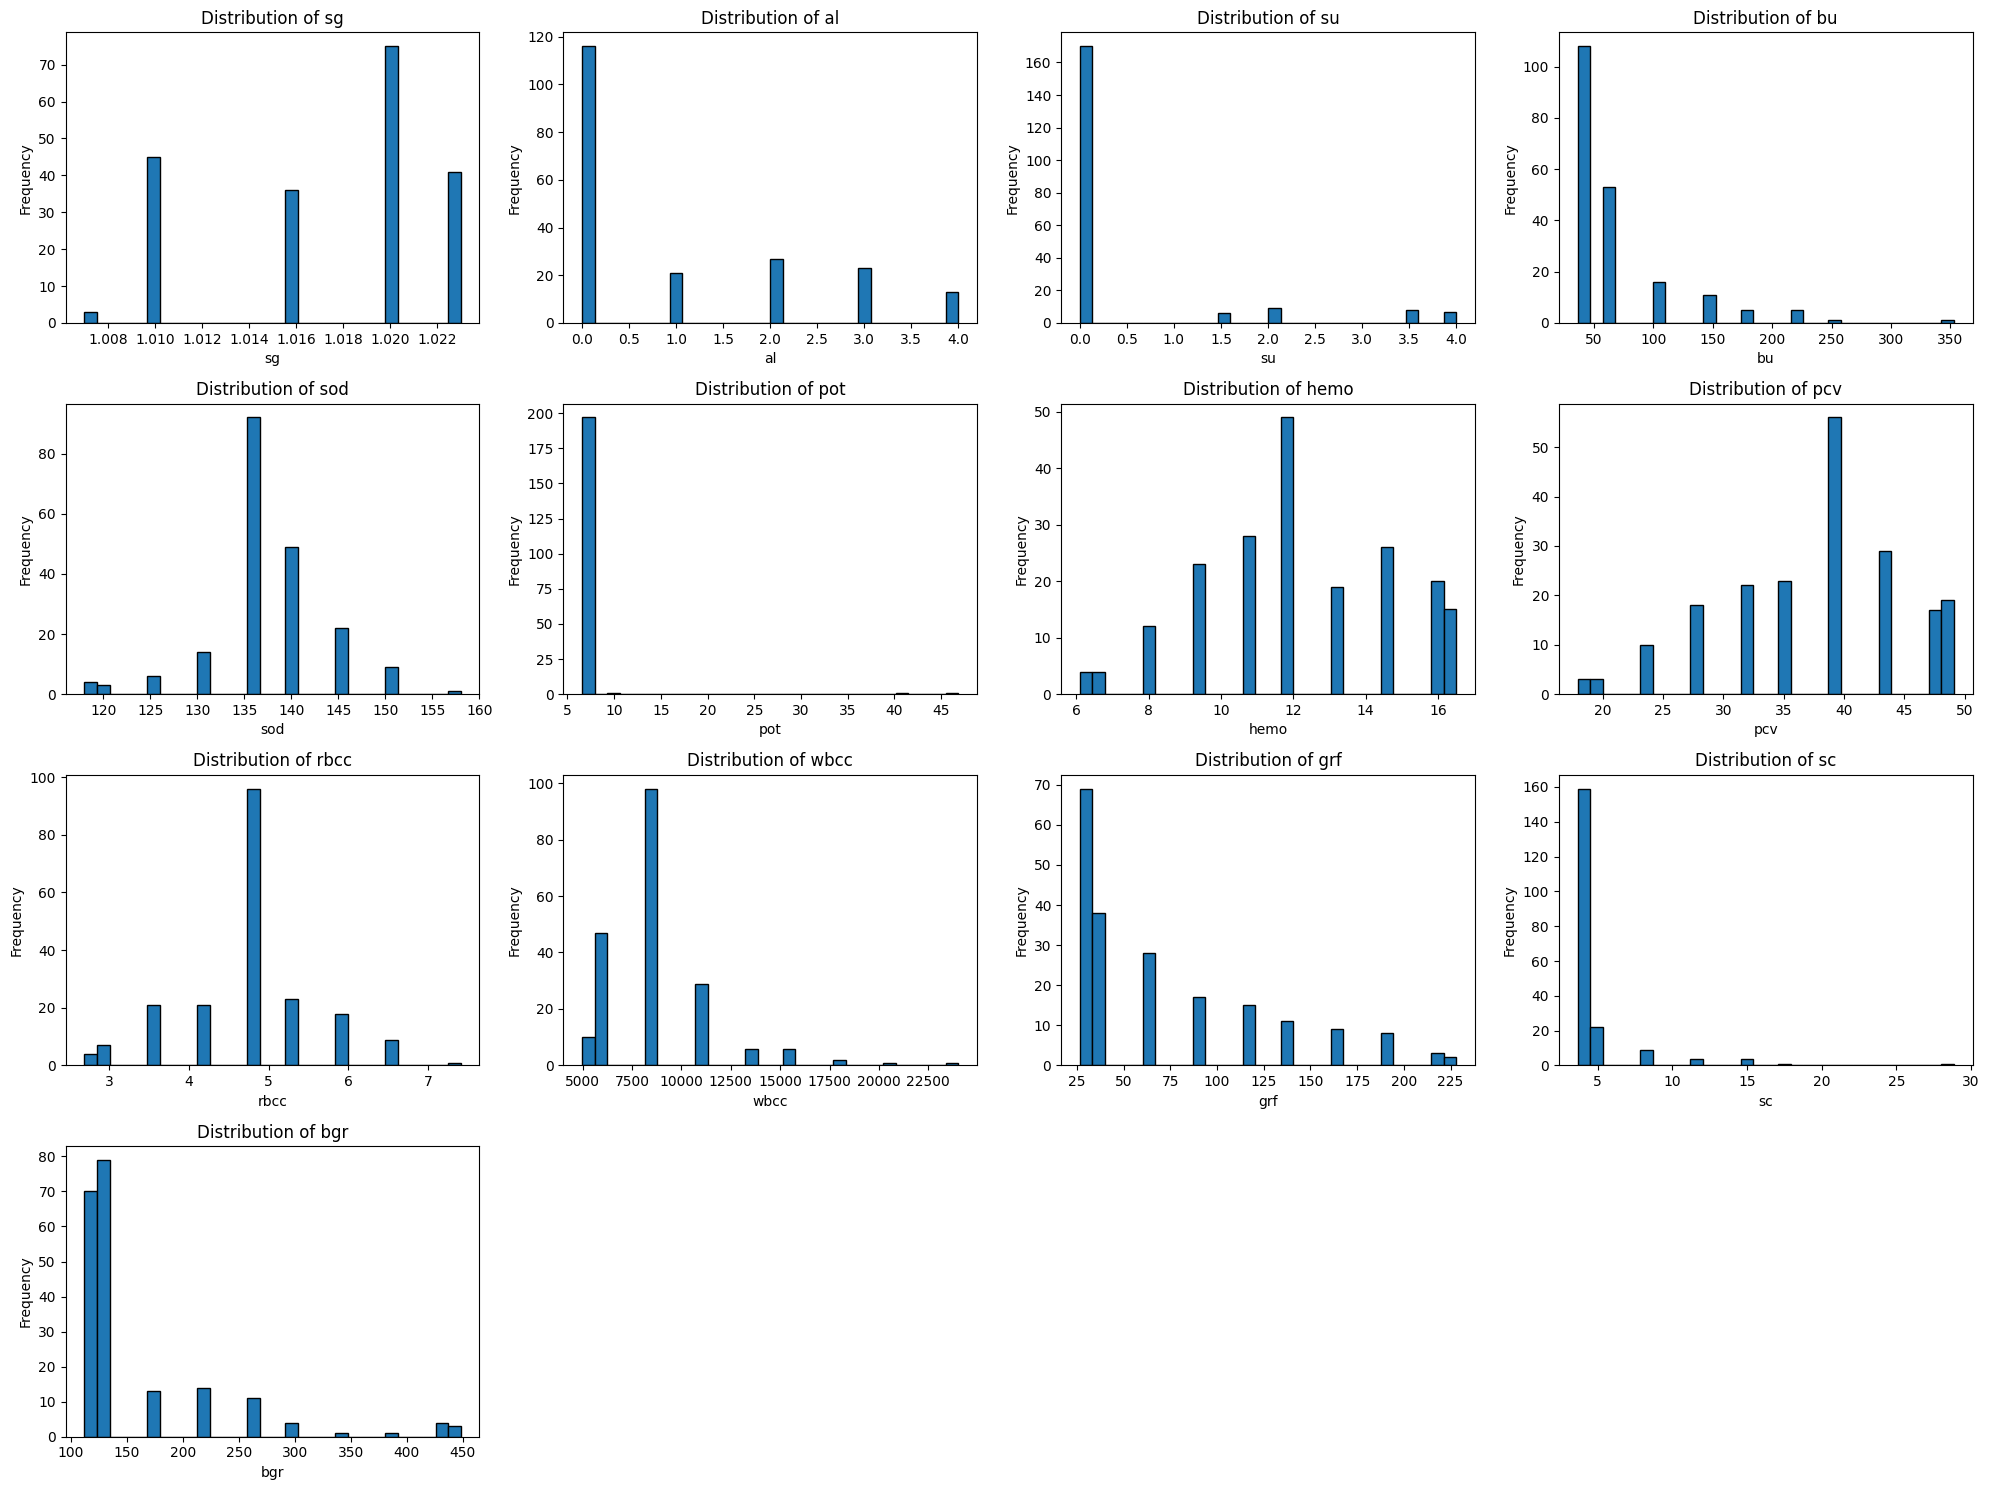

In [ ]:
def process_numeric_columns(df):
    def process_range(value):
        if isinstance(value, str) and '-' in value:
            low, high = map(float, value.strip().split('-'))
            return (low + high) / 2
        return value


    def process_sp(value):
        if isinstance(value, str):
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
            if '>' in value:
                return float(value.replace('> ', ''))
            if '<' in value:
                return float(value.replace('< ', ''))
            if '≥' in value:
                return float(value.replace('≥ ', ''))
        return value


    def process_al(value):
        if isinstance(value, str):
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
            if '<' in value:
                return 0
            if '≥' in value:
                num = float(value.replace('≥', ''))
                return num
        return value


    def process_su(value):
        if isinstance(value, str):
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
            if '<' in value:
                return 0
            if '≥' in value:
                return float(value.replace('≥', ''))
        return value


    def process_ba(value):
        if isinstance(value, str):
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
        return value


    def process_bu(value):
        if isinstance(value, str):
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
            if '<' in value:
                return float(value.replace('< ', '')) * 0.75
            if '>' in value:
                return float(value.replace('> ', '')) * 1.25
            if '≥' in value:
                return float(value.replace('≥', ''))
        return value


    def process_sod(value):
        if isinstance(value, str):
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
            if '<' in value:
                return float(value.replace('< ', ''))
            if '≥' in value:
                return float(value.replace('≥', ''))
        return value


    def process_pot(value):
        if isinstance(value, str):
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
            if '<' in value:
                return float(value.replace('< ', '')) * 0.9
            if '≥' in value:
                return float(value.replace('≥', '')) * 1.1
        return value


    def process_hemo(value):
        if isinstance(value, str):
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
            if '<' in value:
                return float(value.replace('< ', ''))
            if '≥' in value:
                return float(value.replace('≥', ''))
        return value


    def process_pcv(value):
        if isinstance(value, str):
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
            if '<' in value:
                return float(value.replace('< ', ''))
            if '≥' in value:
                return float(value.replace('≥', ''))
        return value


    def process_rbcc(value):
        if isinstance(value, str):
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
            if '<' in value:
                return float(value.replace('< ', ''))
            if '>' in value:
                return float(value.replace('> ', ''))
            if '≥' in value:
                return float(value.replace('≥', ''))
        return value


    def process_wbcc(value):
        if isinstance(value, str):
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
            if '<' in value:
                return float(value.replace('< ', ''))
            if '≥' in value:
                return float(value.replace('≥', ''))
        return value


    def process_grf(value):
        if isinstance(value, str):
            if value == ' p ':
                return float('26.6175')
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
            if '<' in value:
                return float(value.replace('< ', ''))
            if '≥' in value:
                return float(value.replace('≥', ''))
        return value
    def process_sc(value):
        if isinstance(value, str):
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
            if '<' in value:
                return float(value.replace('< ', ''))
            if '≥' in value:
                return float(value.replace('≥', ''))
        return value
    def process_bgr(value):
        if isinstance(value, str):
            if '-' in value:
                low, high = map(float, value.split(' - '))
                return (low + high) / 2
            if '<' in value:
                return float(value.replace('< ', ''))
            if '≥' in value:
                return float(value.replace('≥', ''))
        return value


    df['sg'] = df['sg'].apply(process_sp)
    df['al'] = df['al'].apply(process_al)
    df['su'] = df['su'].apply(process_su)
    df['ba'] = df['ba'].apply(process_ba)
    df['bu'] = df['bu'].apply(process_bu)
    df['sod'] = df['sod'].apply(process_sod)
    df['pot'] = df['pot'].apply(process_pot)
    df['hemo'] = df['hemo'].apply(process_hemo)
    df['pcv'] = df['pcv'].apply(process_pcv)
    df['rbcc'] = df['rbcc'].apply(process_rbcc)
    df['wbcc'] = df['wbcc'].apply(process_wbcc)
    df['grf'] = df['grf'].apply(process_grf)
    df['sc'] = df['sc'].apply(process_sc)
    df['bgr'] = df['bgr'].apply(process_bgr)


    numeric_columns = ['sg', 'al', 'su', 'bu', 'sod', 'pot',
                      'hemo', 'pcv', 'rbcc', 'wbcc', 'grf','sc','bgr']

    for col in numeric_columns:

        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

    plt.figure(figsize=(20, 15))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(4, 4, i)
        plt.hist(df[column], bins=30, edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    return df



df = process_numeric_columns(df)



In [ ]:
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.020,1.0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,227.9440,0,1,8
3,0,0,1.010,0.0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,227.9440,0,1,8
4,0,0,1.010,4.0,0,1,0.0,1,0,1,...,0,0,0,1,0,0,139.8635,0,1,8
5,1,1,1.010,3.0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,139.8635,0,1,8
6,0,0,1.016,0.0,0,0,0.0,0,0,0,...,0,1,0,1,1,0,139.8635,0,1,0




> This function creates grouped bar plots (stacked histograms) to visualize the distribution of numeric columns split by a binary class column (e.g., 'cdk' vs. 'not cdk'). For each numeric column, it plots the frequency distribution with distinct colors for each class using a manual legend for clarity. This visualization helps in identifying patterns or differences between the two classes for each numeric feature.



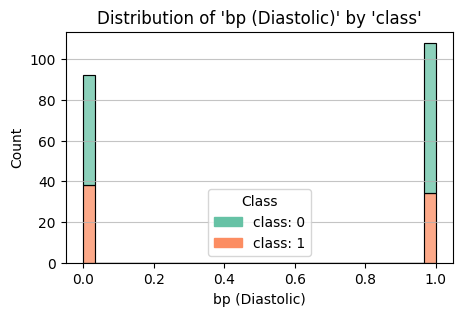

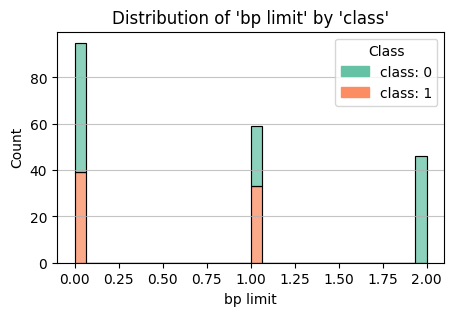

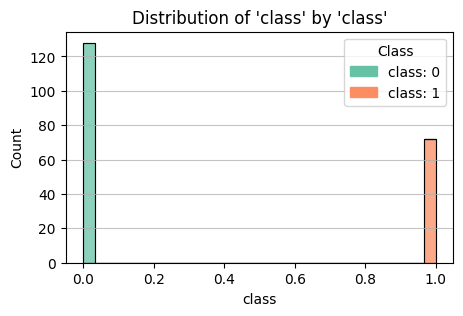

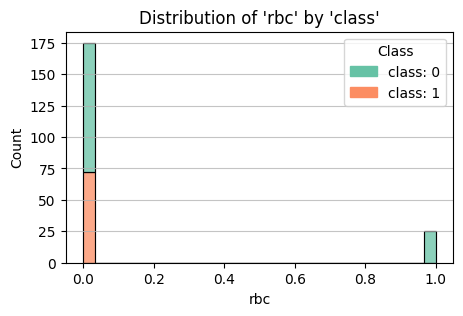

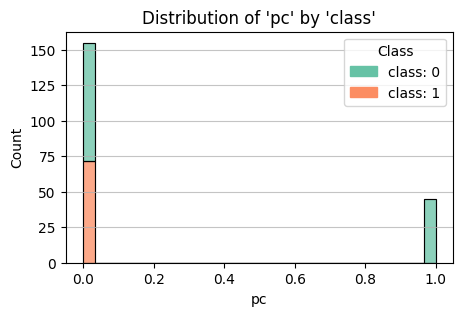

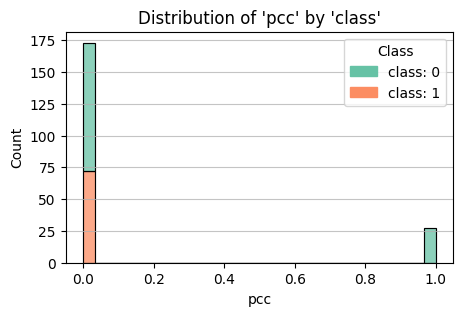

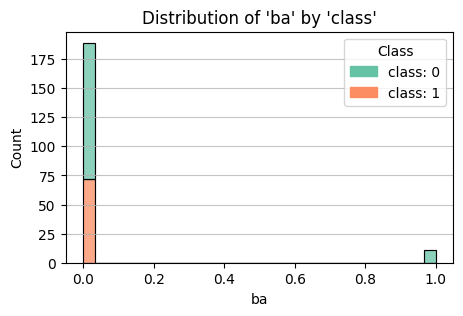

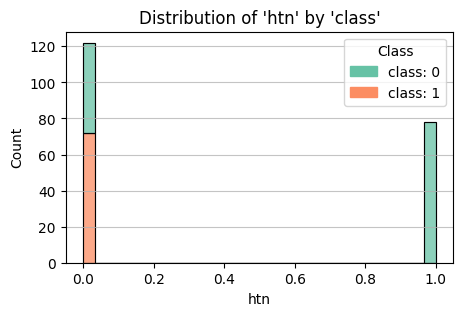

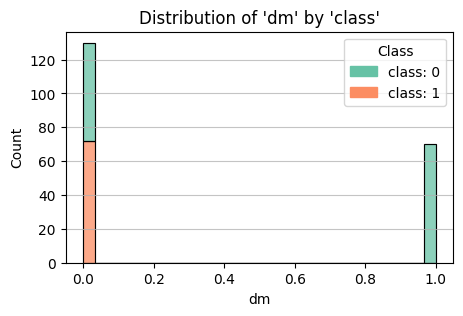

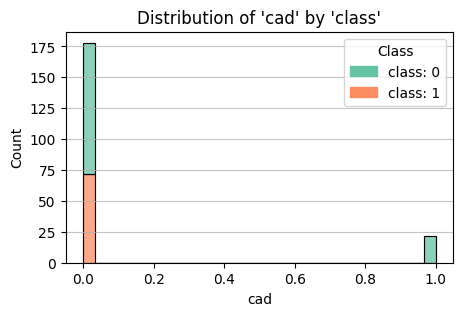

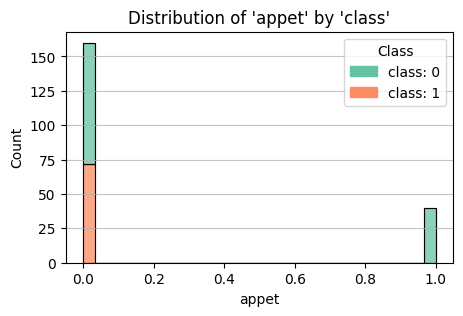

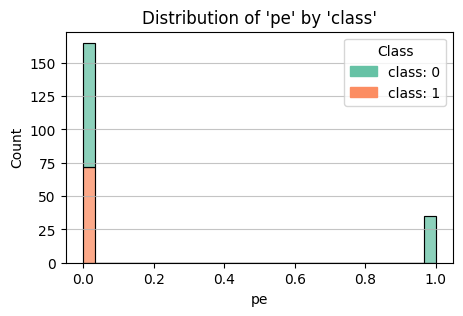

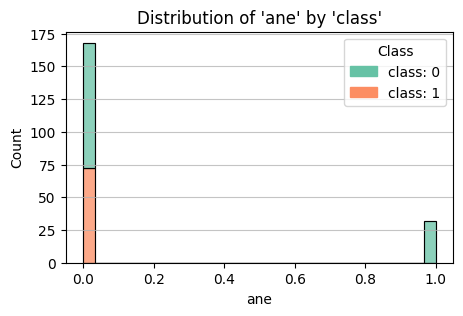

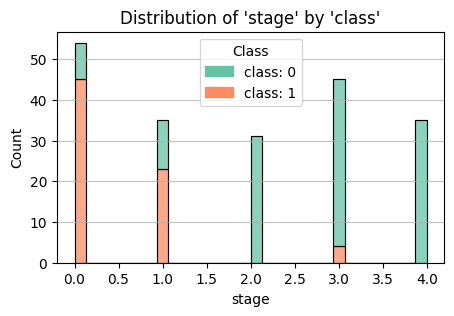

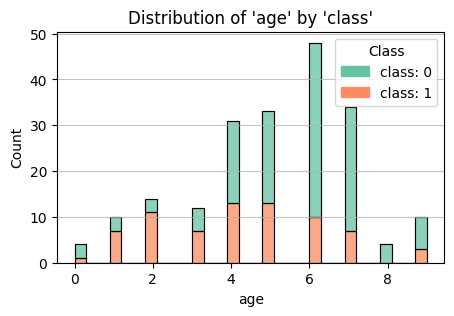

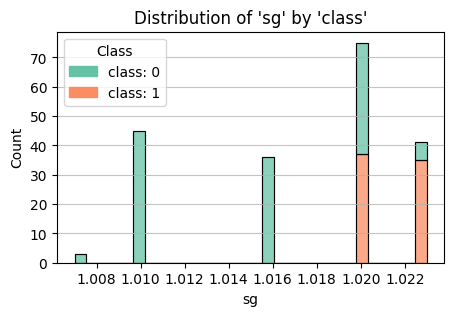

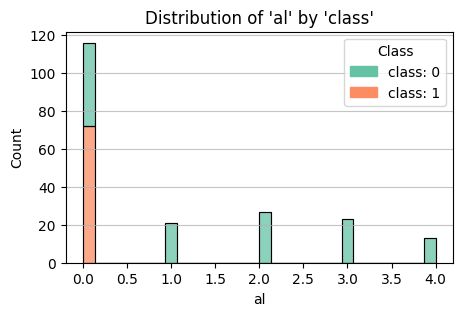

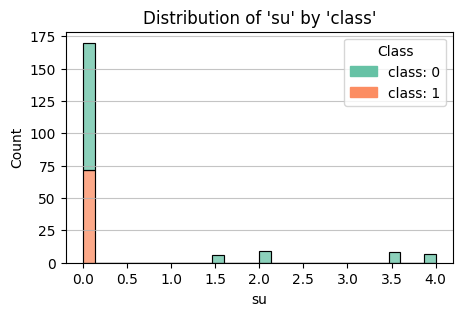

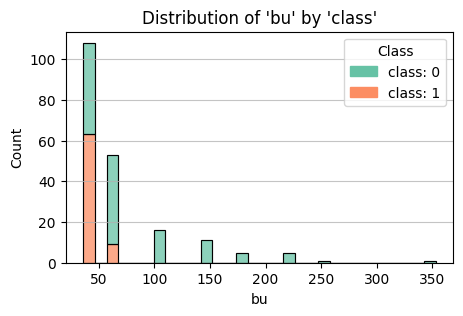

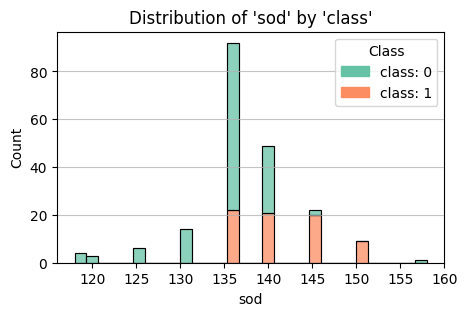

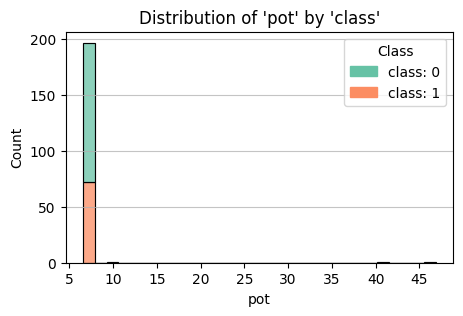

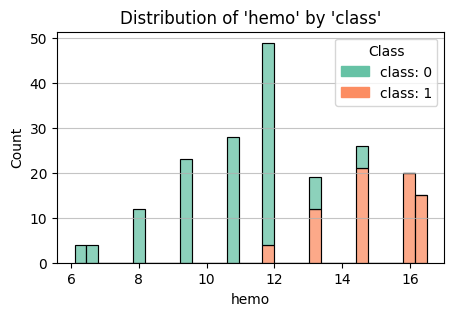

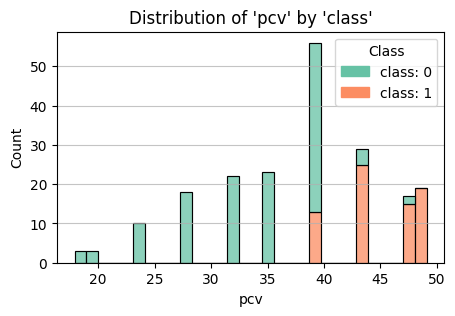

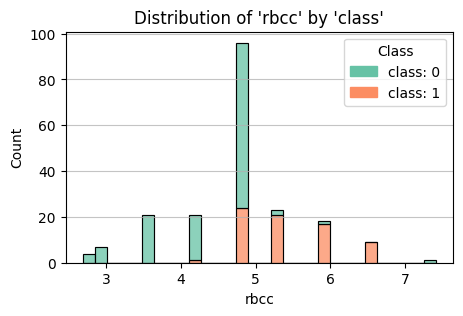

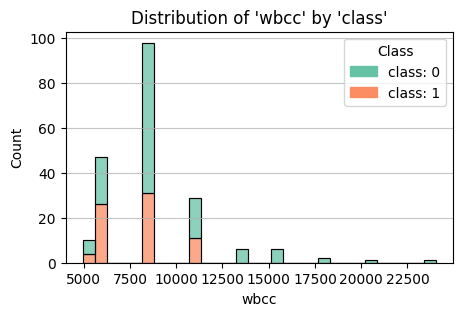

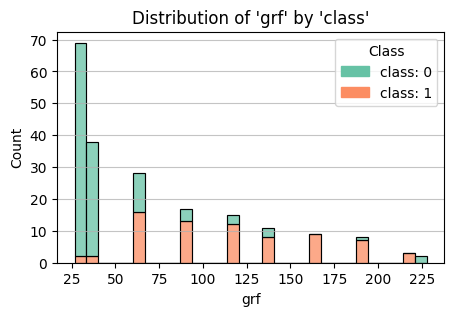

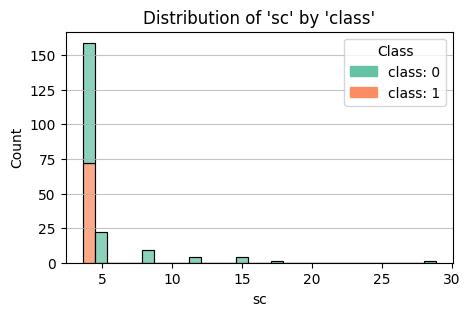

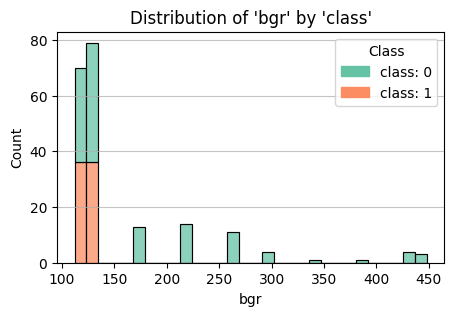

In [ ]:

# Function to create grouped bar plots for numeric columns split by 'class'
def plot_class_vs_numeric(df, class_column, numeric_columns):
    """
    Create grouped bar plots to compare 'class' column distributions
    across numeric columns.

    Parameters:
    - df: DataFrame containing the dataset.
    - class_column: The column with binary categories (e.g., 'cdk' and 'not cdk').
    - numeric_columns: List of numeric columns to compare with the 'class' column.
    """
    for numeric_column in numeric_columns:
        plt.figure(figsize=(5, 3))
        # Plot histogram
        plot = sns.histplot(
            data=df,
            x=numeric_column,
            hue=class_column,
            multiple="stack",
            bins=30,
            palette="Set2",
            kde=False
        )

        # Extract the palette colors
        unique_classes = df[class_column].dropna().unique()
        palette = sns.color_palette("Set2", len(unique_classes))
        color_mapping = {cls: palette[i] for i, cls in enumerate(unique_classes)}

        # Manually create the legend
        handles = [plt.Rectangle((0, 0), 1, 1, color=color_mapping[cls]) for cls in unique_classes]
        labels = [f"{class_column}: {cls}" for cls in unique_classes]
        plt.legend(handles=handles, labels=labels, title="Class")

        # Set title, labels, and grid
        plt.title(f"Distribution of '{numeric_column}' by '{class_column}'")
        plt.xlabel(numeric_column)
        plt.ylabel("Count")
        plt.grid(axis='y', alpha=0.75)


        plt.show()


class_column = 'class'
numeric_columns = [ 'bp (Diastolic)',
    'bp limit',
    'class',
    'rbc',
    'pc',
    'pcc',
    'ba',
    'htn',
    'dm',
    'cad',
    'appet',
    'pe',
    'ane',
    'stage',
    'age','sg', 'al', 'su', 'bu', 'sod', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'grf', 'sc', 'bgr']


plot_class_vs_numeric(df, class_column, numeric_columns)


This code generates Q-Q (Quantile-Quantile) plots for each numeric column in the dataset. Q-Q plots are used to assess whether the data follows a normal distribution by comparing the quantiles of the dataset against the theoretical quantiles of a normal distribution. The line='45' argument adds a reference diagonal line to help visually compare the data's distribution with the expected normal distribution. This visualization is useful for detecting skewness, kurtosis, or other deviations from normality.

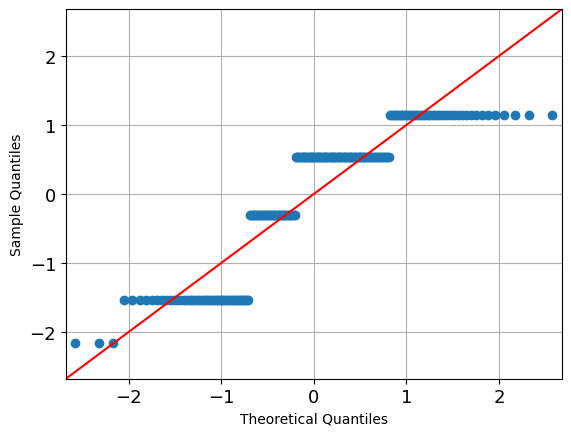

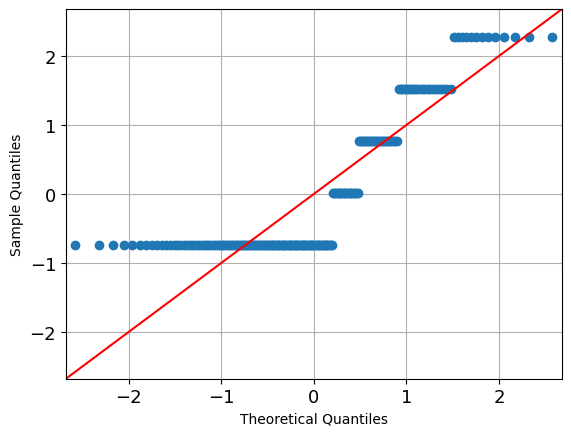

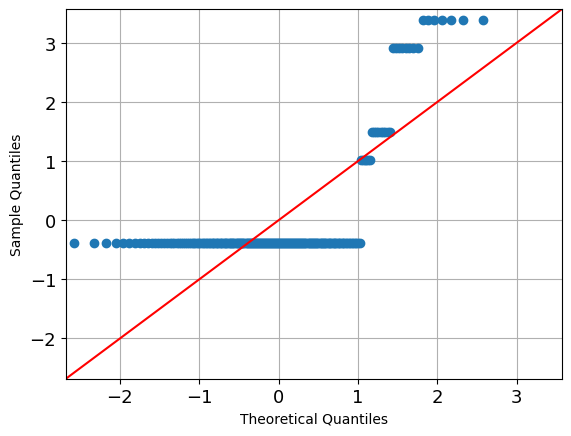

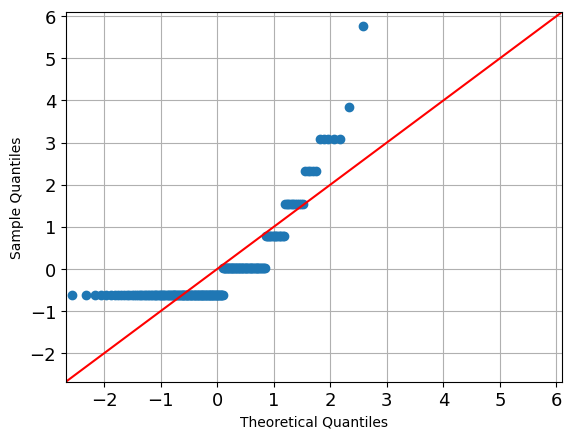

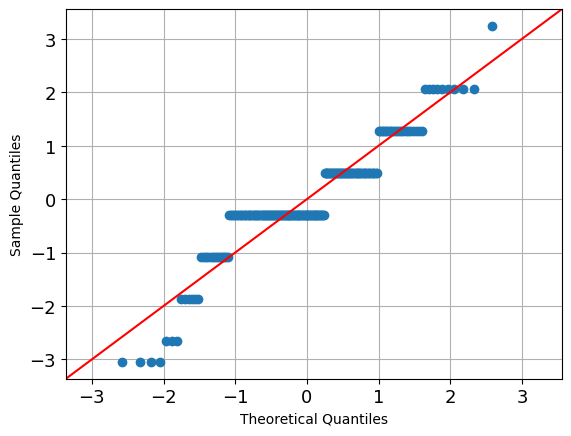

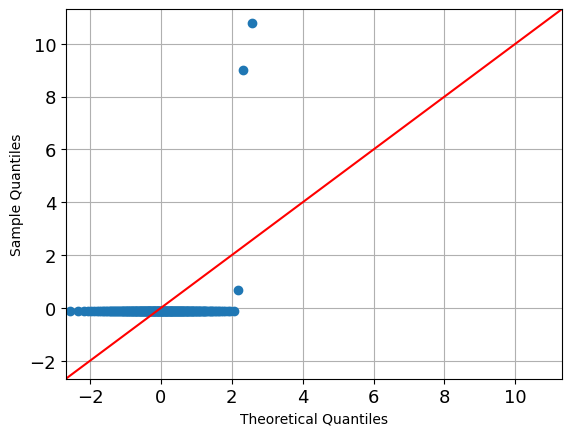

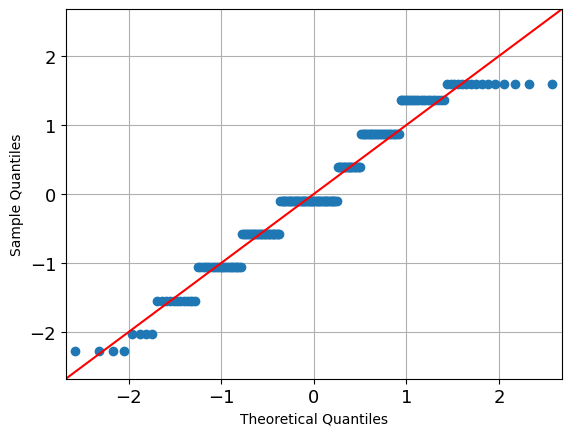

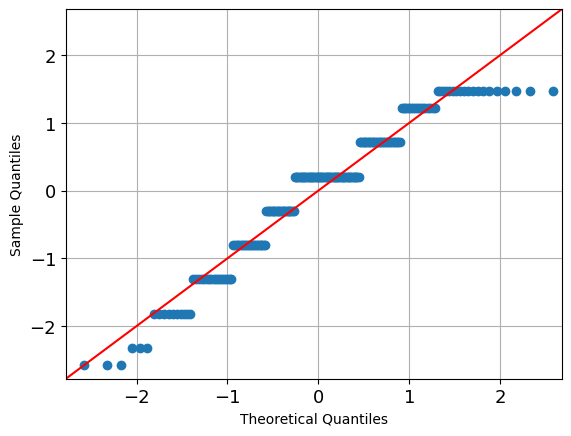

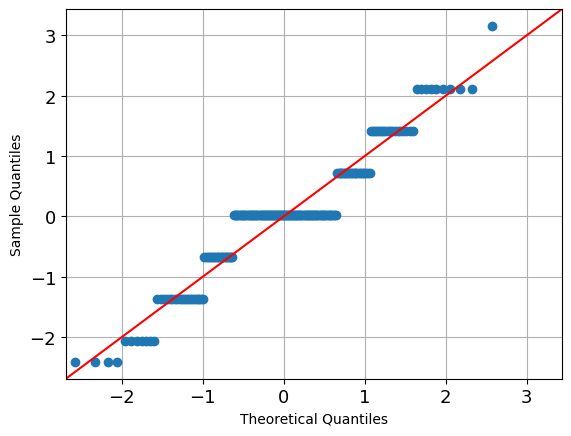

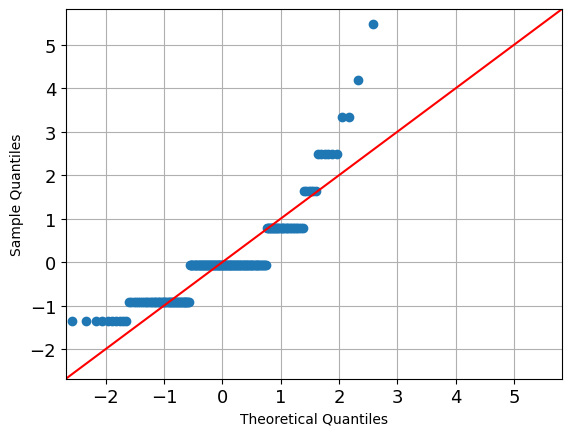

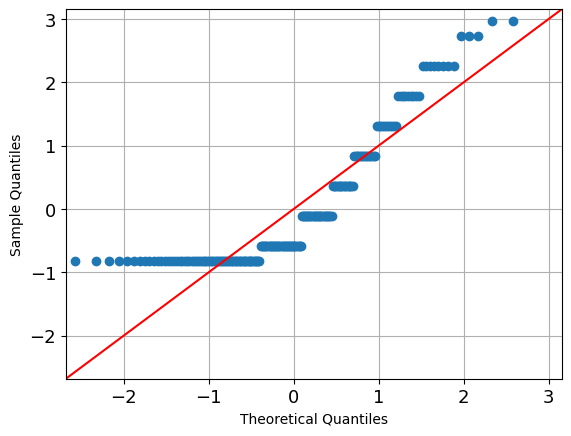

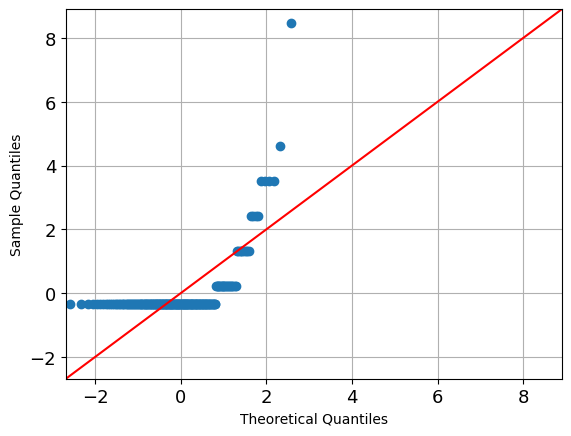

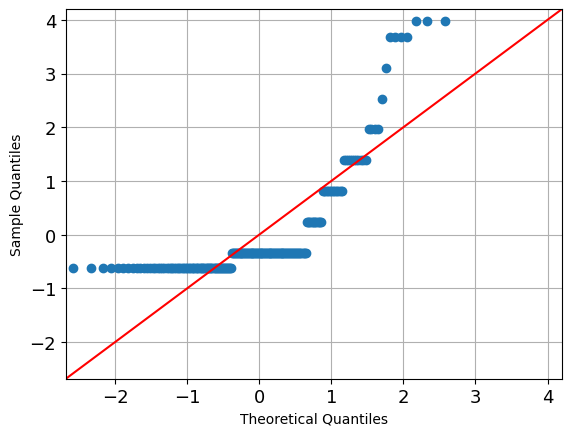

In [ ]:


def detect_outliers_iqr(df, columns):
    """
    Detect outliers using the Interquartile Range (IQR) method.
    """
    outlier_indices = []
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outlier_indices.extend(outliers)


    return list(set(outlier_indices))




numeric_columns = ['sg', 'al', 'su', 'bu', 'sod', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'grf', 'sc', 'bgr']
for cols in numeric_columns:
  fig=qqplot(df[cols],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.grid(True)
  plt.show()


This script identifies and removes outliers from both numeric and categorical columns using the IQR method. It flags outliers in the dataset, creates a cleaned version without these flagged rows, and visualizes the data distributions before and after outlier removal through side-by-side histograms. Numeric and categorical columns are processed separately to ensure proper handling. The cleaned dataset is then saved as cleaned_dataset.csv for further analysis or modeling, ensuring more accurate results by eliminating anomalies.

Plotting data before and after removing outliers...


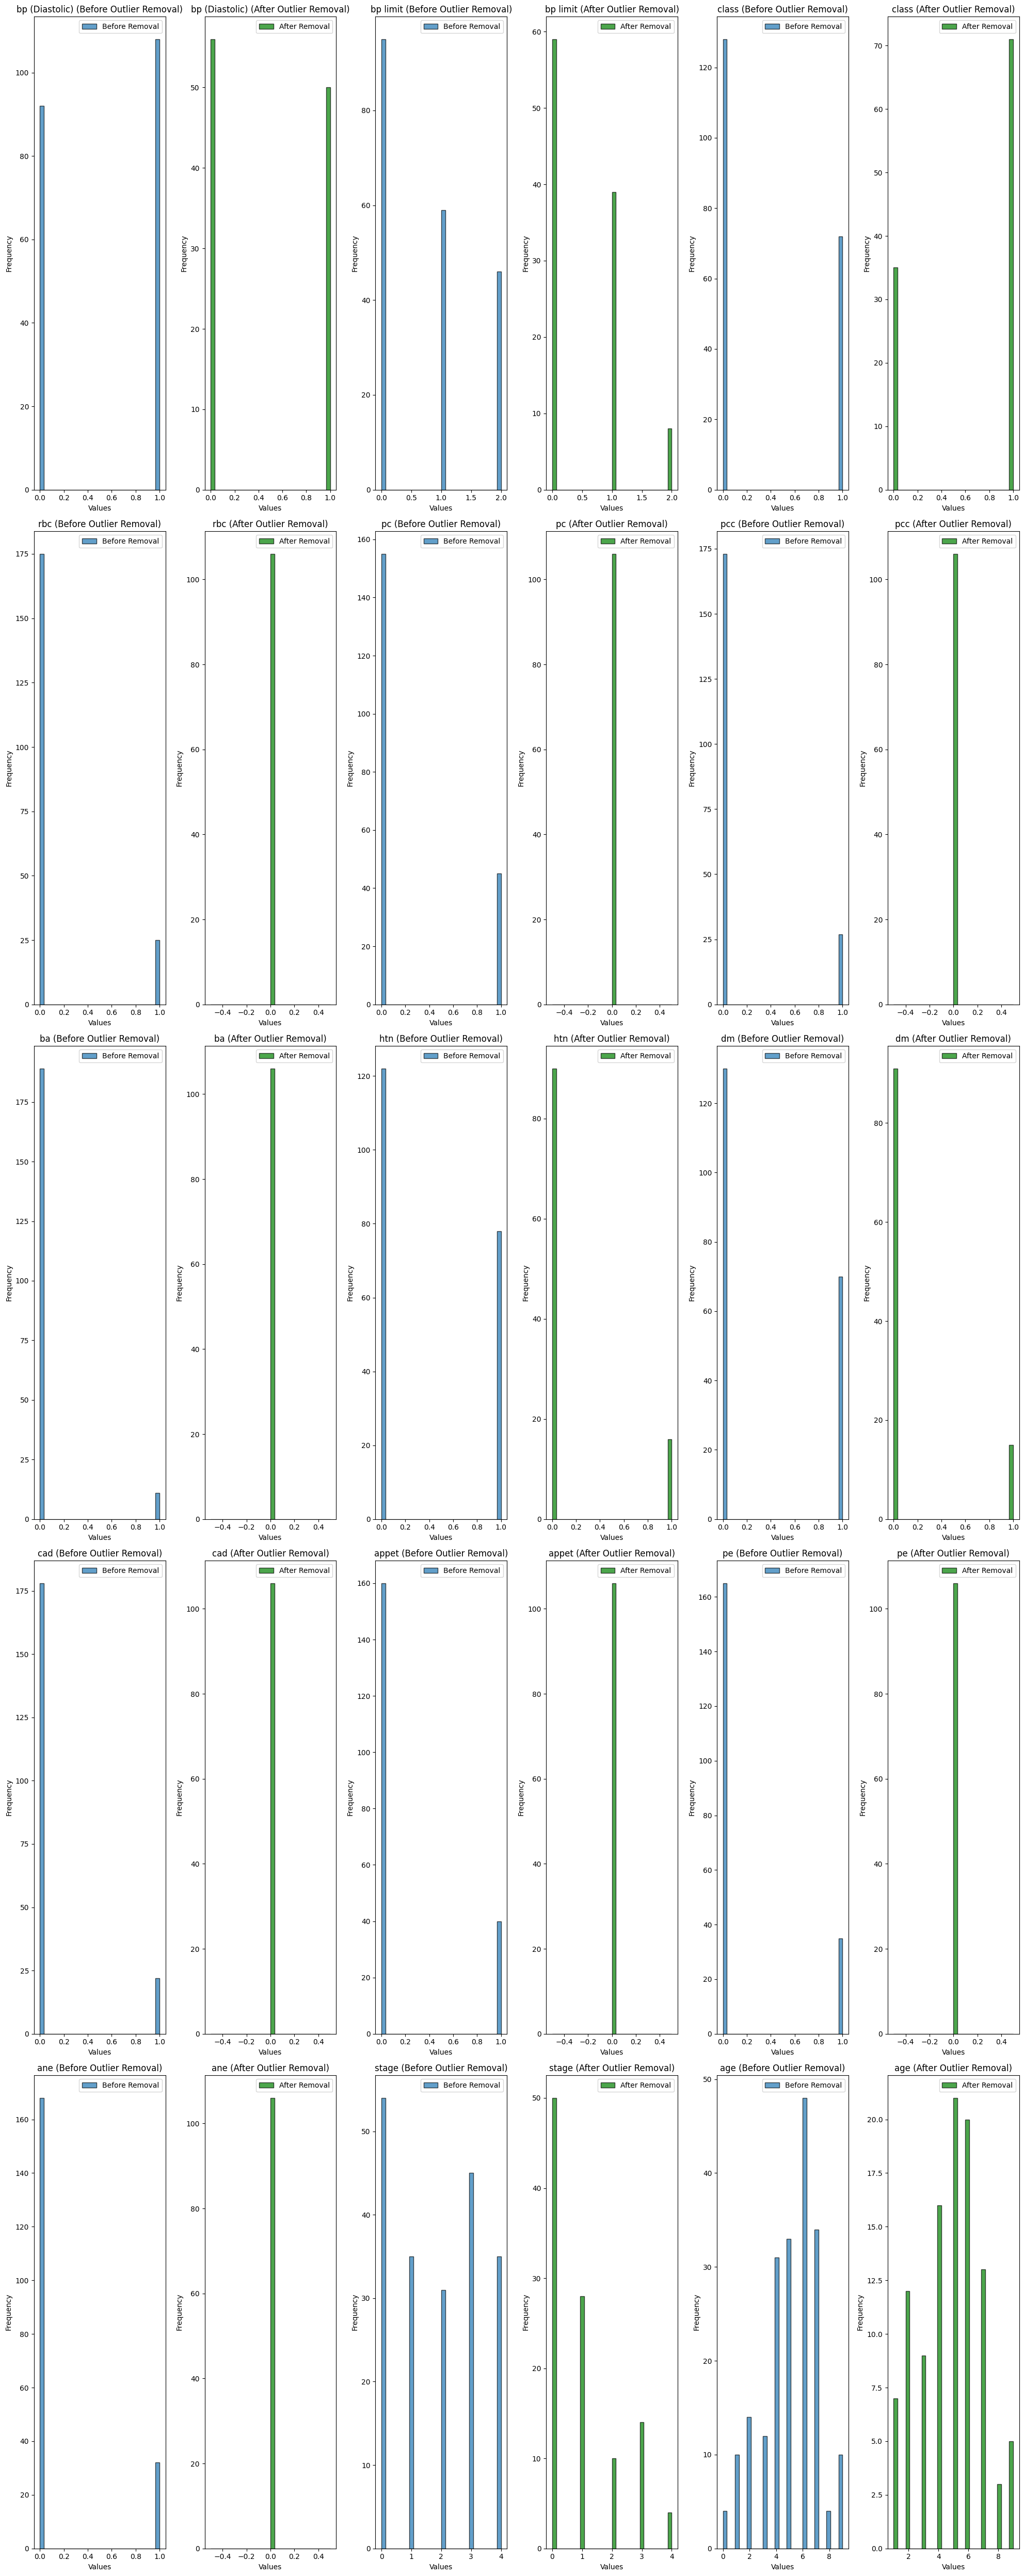

new
Plotting data before and after removing outliers...


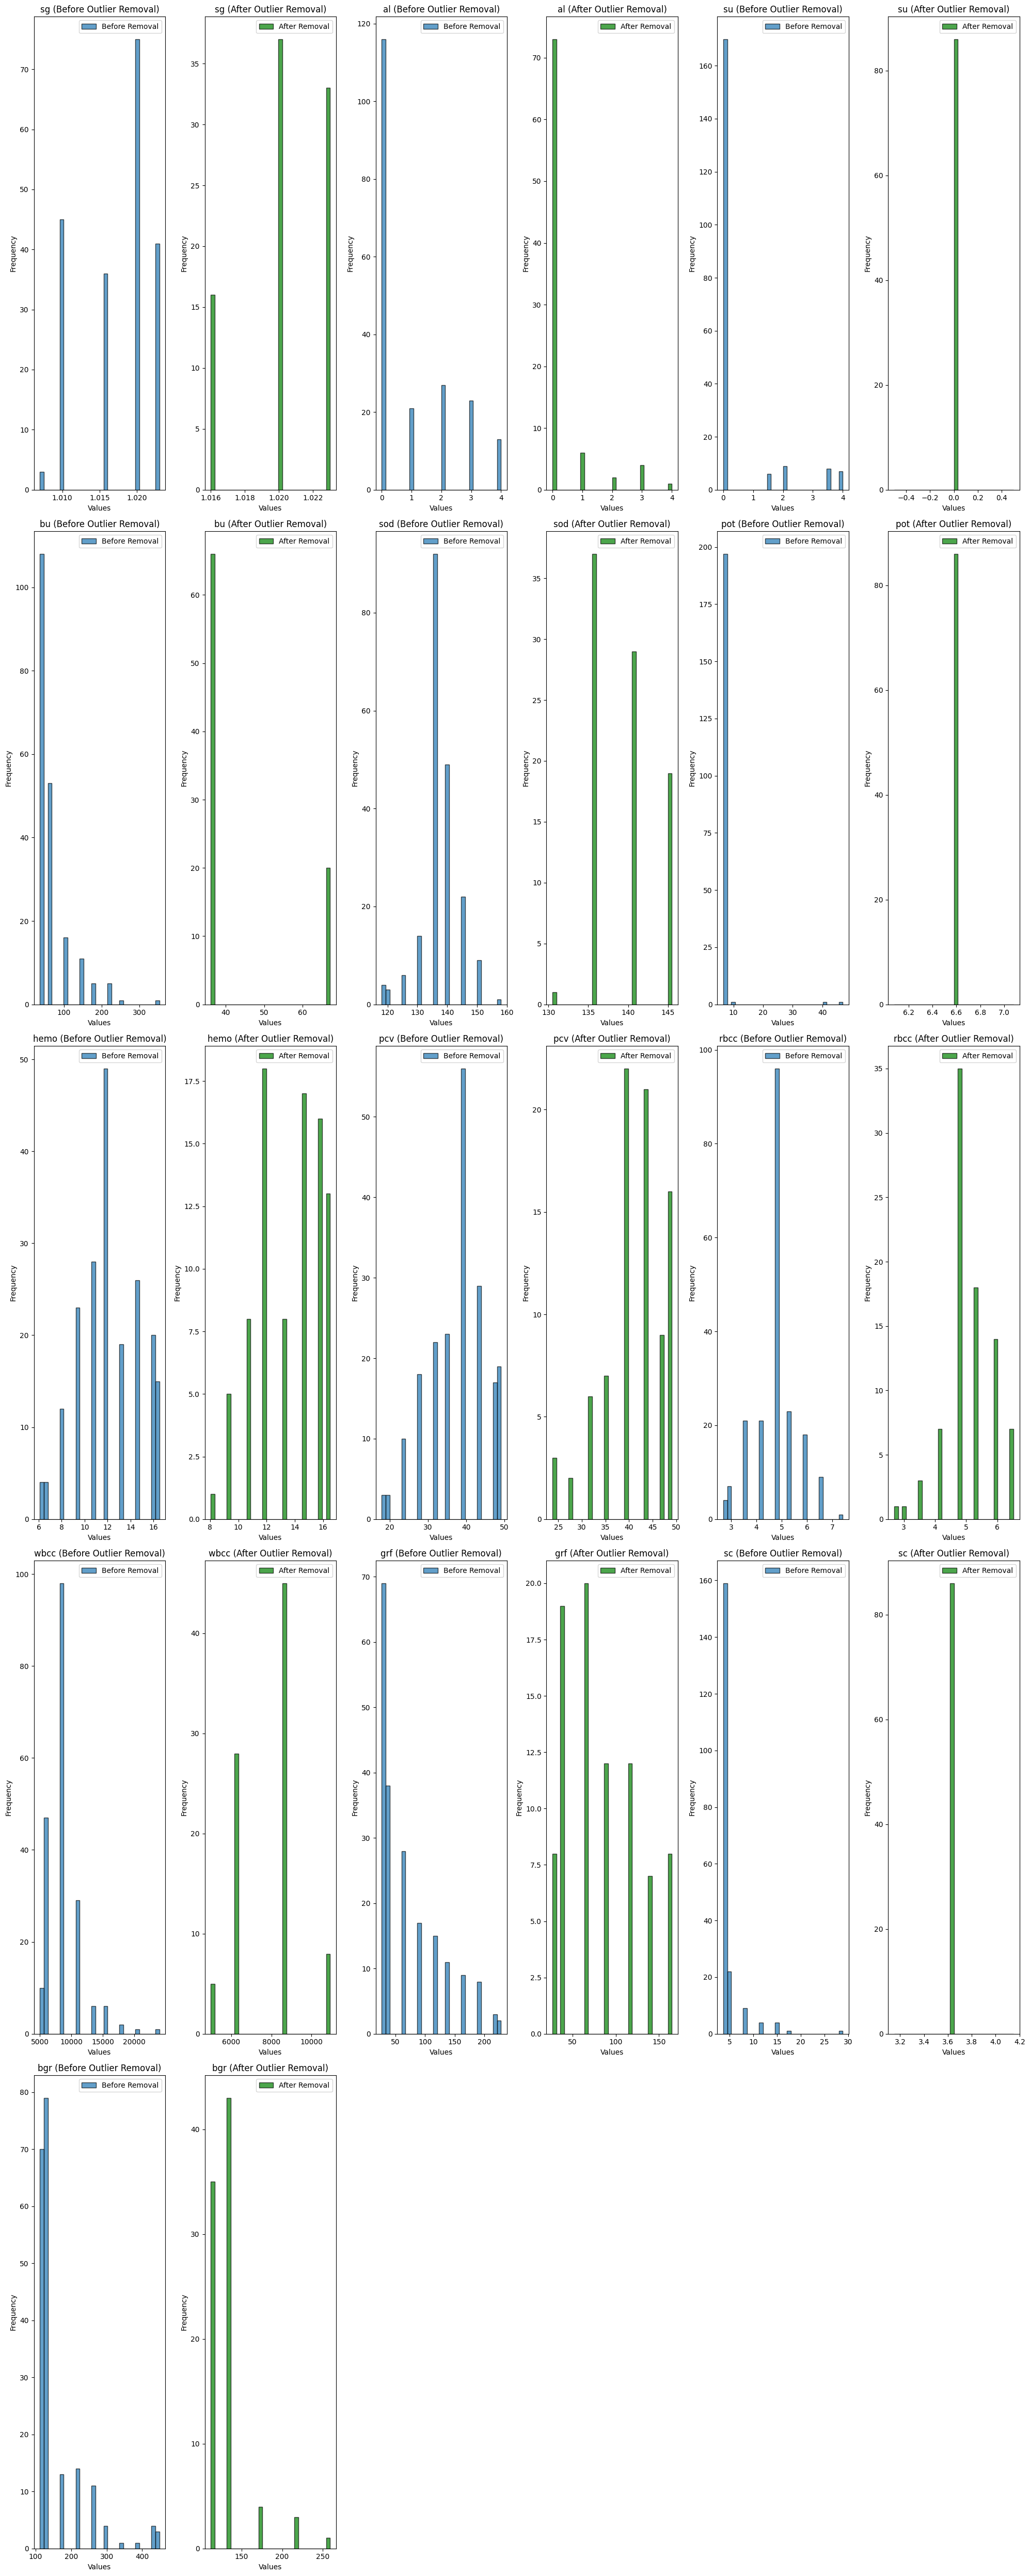

In [ ]:

# Function to visualize data before and after outlier removal
def plot_before_after(df_before, df_after, columns):
    """
    Plot histograms before and after removing outliers for the given columns.
    """
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols
    plt.figure(figsize=(20, 10 * n_rows))

    for idx, column in enumerate(columns, 1):
        # Before outlier removal
        plt.subplot(n_rows, n_cols * 2, 2 * idx - 1)
        plt.hist(df_before[column], bins=30, edgecolor='black', alpha=0.7, label='Before Removal')
        plt.title(f'{column} (Before Outlier Removal)')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.legend()

        # After outlier removal
        plt.subplot(n_rows, n_cols * 2, 2 * idx)
        plt.hist(df_after[column], bins=30, edgecolor='black', alpha=0.7, color='green', label='After Removal')
        plt.title(f'{column} (After Outlier Removal)')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Step 1: Detect outliers using IQR and Z-Score methods
numeric_columns = [
    'bp (Diastolic)',
    'bp limit',
    'class',
    'rbc',
    'pc',
    'pcc',
    'ba',
    'htn',
    'dm',
    'cad',
    'appet',
    'pe',
    'ane',
    'stage',
    'age'
]
category=['sg', 'al', 'su', 'bu', 'sod', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'grf', 'sc', 'bgr']
iqr_outliers = detect_outliers_iqr(df, numeric_columns)



combined_outliers = iqr_outliers


df_with_outliers = df.copy()
df_with_outliers['Outlier'] = df_with_outliers.index.isin(iqr_outliers)


df_without_outliers = df_with_outliers[~df_with_outliers['Outlier']].drop(columns=['Outlier'])


print("Plotting data before and after removing outliers...")
plot_before_after(df, df_without_outliers, numeric_columns)

##################################
print('new')
iqr_outliers_1 = detect_outliers_iqr(df, category)
combined_outliers = iqr_outliers


df_with_outliers = df.copy()
df_with_outliers['Outlier_1'] = df_with_outliers.index.isin(iqr_outliers_1)


df_without_outliers = df_with_outliers[~df_with_outliers['Outlier_1']].drop(columns=['Outlier_1'])

# Step 4: Plot before and after removing outliers
print("Plotting data before and after removing outliers...")
plot_before_after(df, df_without_outliers, category)



This script performs linear regression analysis on a dataset while addressing class imbalance using SMOTE (Synthetic Minority Oversampling Technique). It includes the following steps:

**Handling Class Imbalance:**
        SMOTE is applied to the training data to oversample the minority class, balancing the class distribution.

**Model Training**:
        The data is scaled, and a linear regression model is trained using the resampled data. Permutation importance is used to identify key features contributing to the predictions.

**Visualization:**
        Multiple plots are generated, including scatter plots for actual vs. predicted values, pie charts of feature importance, and histograms of feature distributions in training and testing data.

**Evaluation:**
        The model's performance is assessed using metrics such as R², MSE, and RMSE for both training and testing datasets.
        Feature importance is visualized with a dot plot, highlighting the most influential predictors.

**Output:**
        Key metrics and the top 5 features are printed, and a series of visualizations provide insights into the model's predictions and feature relationships.

This approach ensures balanced training data, interpretable results, and insights into model performance and feature significance.
-


Data Overview:
Number of samples: 200
Number of features: 27

Feature names: ['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'age']


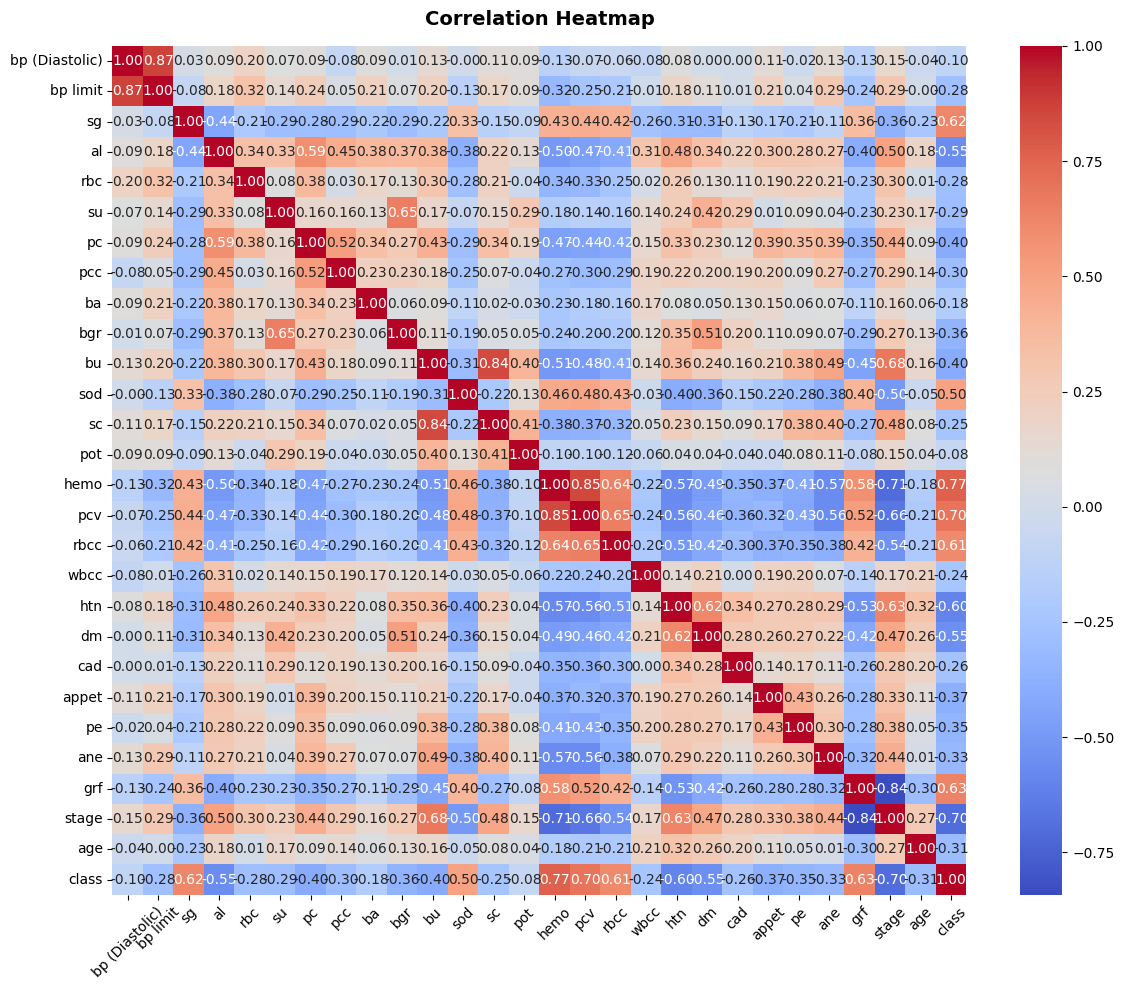

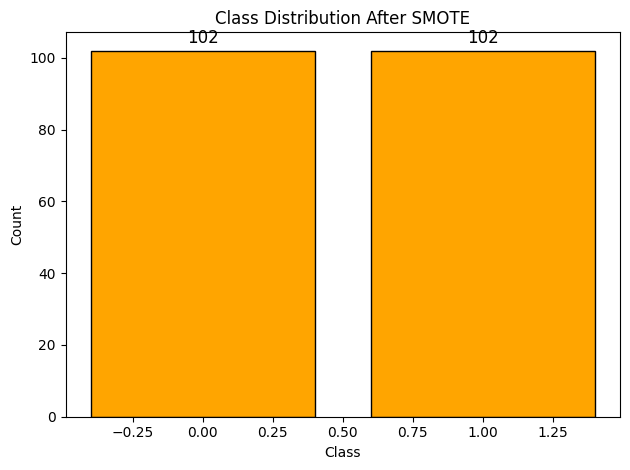

Weight,Feature
0.2890 ± 0.2555,hemo
0.1698 ± 0.1780,sg
0.0431 ± 0.0255,bp (Diastolic)
0.0377 ± 0.0139,rbc
0.0252 ± 0.0984,bp limit
0.0248 ± 0.0742,stage
0.0189 ± 0.0365,al
0.0185 ± 0.0272,ane
0.0184 ± 0.0252,ba
0.0126 ± 0.0168,sc


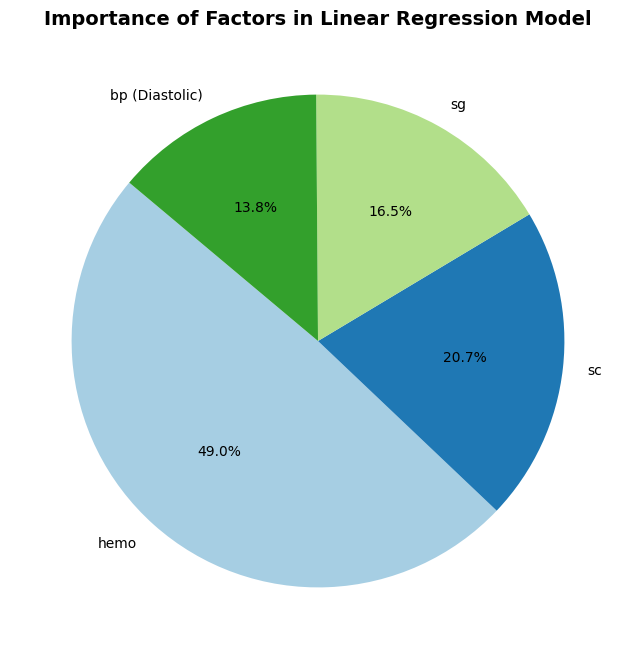

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


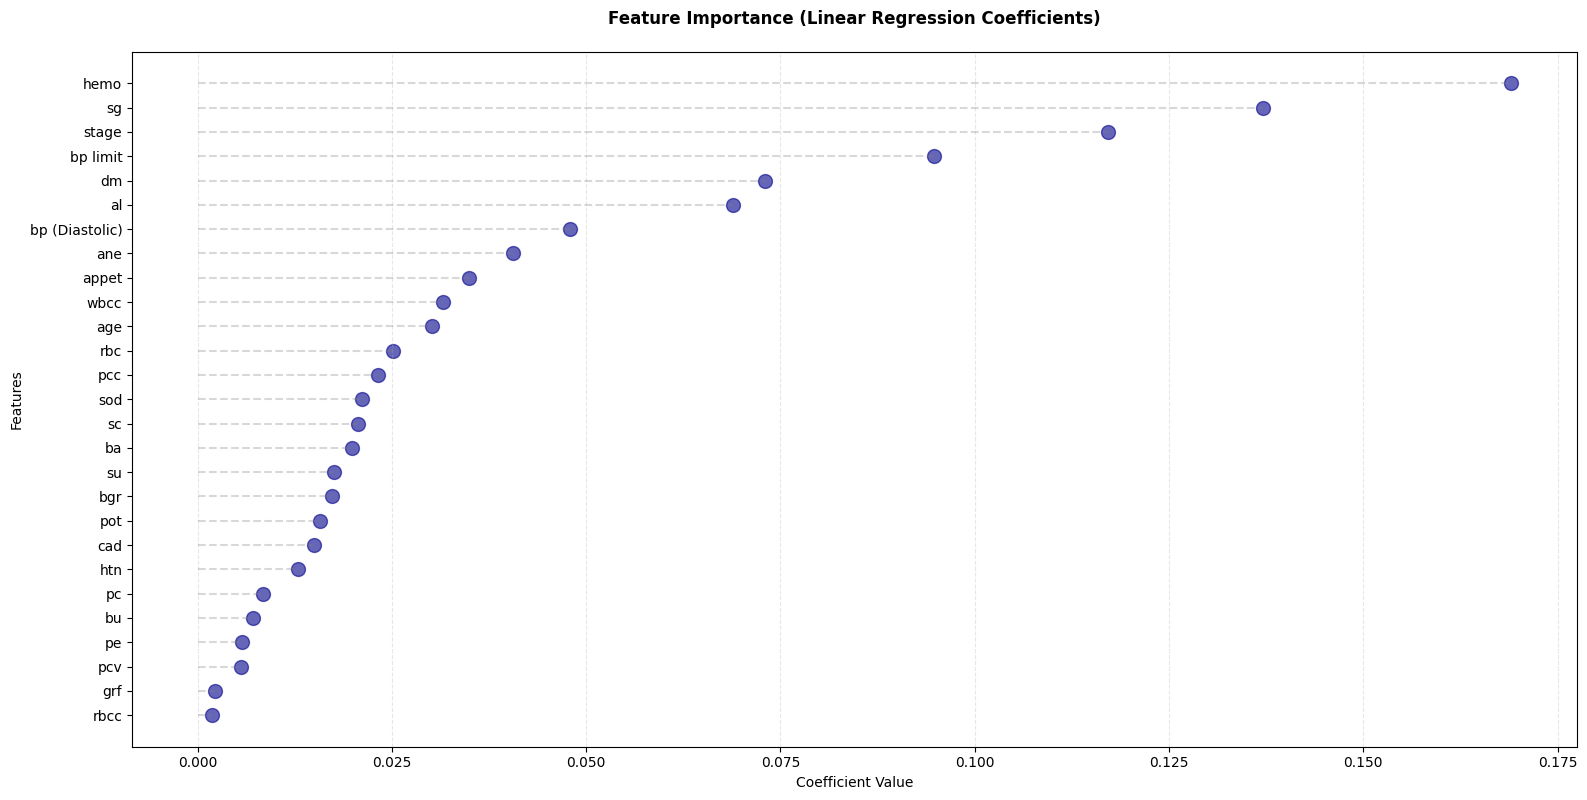


Model Performance Metrics:
R2_train: 0.8360
R2_test: 0.7361
MSE_train: 0.0410
MSE_test: 0.0600
RMSE_train: 0.2025
RMSE_test: 0.2450

Top 5 Most Important Features:
     Feature  Coefficient  abs_corr
19        dm    -0.072985  0.072985
1   bp limit    -0.094702  0.094702
25     stage    -0.117156  0.117156
2         sg     0.137110  0.137110
14      hemo     0.169030  0.169030


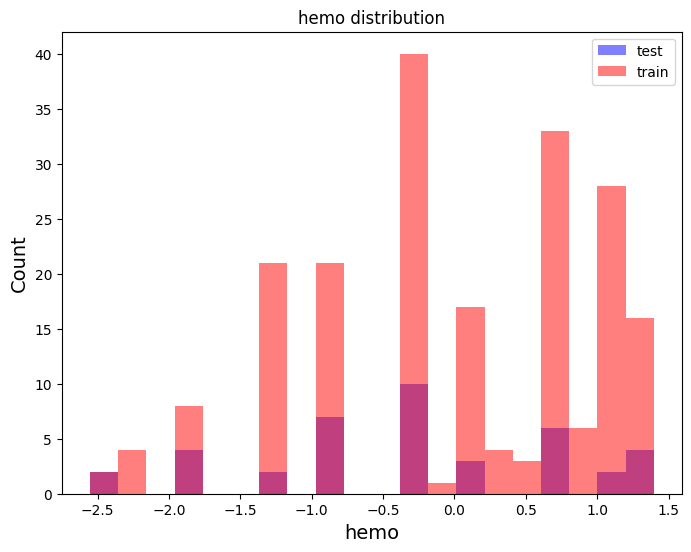

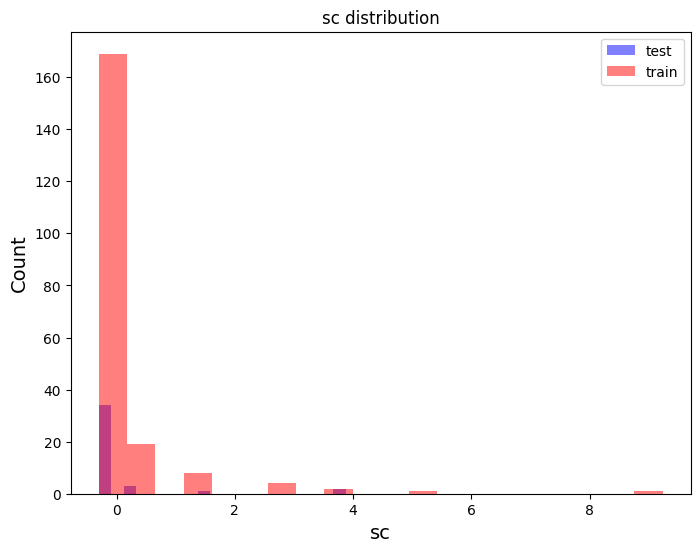

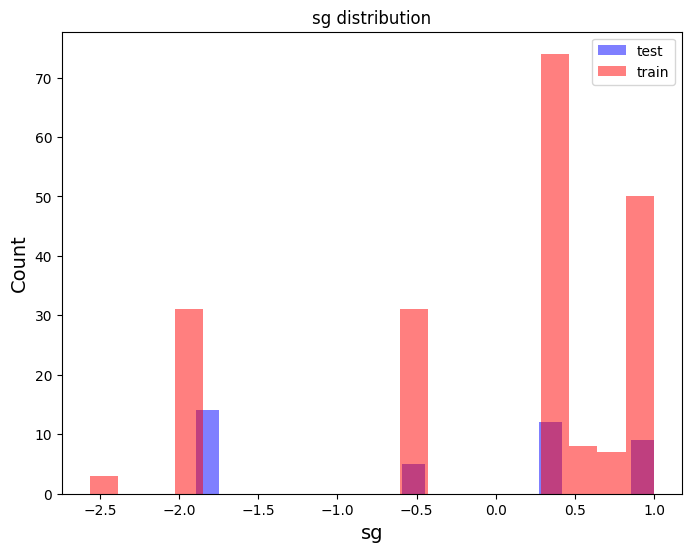

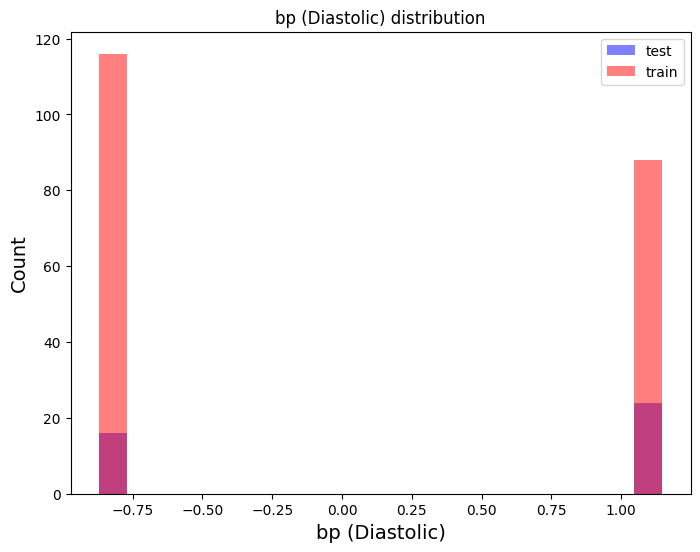

In [ ]:
from collections import Counter
def plot_regression_results(y_true, y_pred, title="Actual vs Predicted Values"):
    """
    Create a scatter plot of actual vs predicted values with the regression line.
    """
    # Create the figure
    plt.figure(figsize=(10, 6))

    # Create scatter plot of actual vs predicted values
    plt.scatter(y_true, y_pred,
               color='darkblue',
               alpha=0.5,
               label='Data Points')

    # Calculate the diagonal line (perfect predictions)
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    diagonal = np.linspace(min_val, max_val, 100)

    plt.plot(diagonal, diagonal,
            'r--',
            label='Perfect Predictions',
            alpha=0.8)

    plt.title(title, pad=20, fontsize=12, fontweight='bold')
    plt.xlabel('Actual Values', fontsize=10)
    plt.ylabel('Predicted Values', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    metrics_text = f'R² Score: {r2:.3f}\nRMSE: {rmse:.3f}'
    plt.text(0.05, 0.95, metrics_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()



def analyze_linear_regression_with_smote(df, target_col, test_size=0.2, random_state=42):
    """
    Perform linear regression analysis with SMOTE for handling class imbalance.
    """
    # Exclude unwanted columns (e.g., 'z_score')
    df = df.drop(columns=['z_score'], errors='ignore')

    # Separate features and target
    y = df[target_col]
    X = df.drop(target_col, axis=1)

    # Select only numeric columns
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    X = X[numeric_cols]

    print("Data Overview:")
    print(f"Number of samples: {len(df)}")
    print(f"Number of features: {len(numeric_cols)}")
    print("\nFeature names:", numeric_cols.tolist())
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numeric_cols.tolist() + [target_col]].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title("Correlation Heatmap", fontsize=14, fontweight='bold', pad=15)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Apply SMOTE to the training data
    smote = SMOTE(random_state=random_state)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    ## visualize smote
    class_counts = Counter(y_train_smote)

    # Plotting the distribution
    plt.bar(class_counts.keys(), class_counts.values(), color='orange', edgecolor='black')
    for key, value in class_counts.items():
        plt.text(key, value + 2, str(value), ha='center', fontsize=12)  # Add value labels

    plt.title("Class Distribution After SMOTE")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_smote)
    X_test_scaled = scaler.transform(X_test)


    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


    model = LinearRegression()
    model.fit(X_train_scaled_df, y_train_smote)


    pi = PermutationImportance(model, random_state=1).fit(X_test_scaled_df, y_test)
    display(eli5.show_weights(pi, feature_names=X_test.columns.tolist()))


    factors = ['hemo', 'sc', 'sg', 'bp (Diastolic)']
    importance_means = [0.2937, 0.1239, 0.0990, 0.0825]



    plt.figure(figsize=(8, 8))
    plt.pie(importance_means, labels=factors, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

    plt.title('Importance of Factors in Linear Regression Model', fontsize=14, fontweight='bold')

    plt.show()
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    metrics = {
    'R2_train': r2_score(y_train_smote, y_pred_train),
    'R2_test': r2_score(y_test, y_pred_test),
    'MSE_train': mean_squared_error(y_train_smote, y_pred_train),
    'MSE_test': mean_squared_error(y_test, y_pred_test),
    'RMSE_train': np.sqrt(mean_squared_error(y_train_smote, y_pred_train)),
    'RMSE_test': np.sqrt(mean_squared_error(y_test, y_pred_test))
}

    feature_importance = pd.DataFrame({
        'Feature': numeric_cols,
        'Coefficient': model.coef_,
        'abs_corr':abs(model.coef_)
    })
    feature_importance = feature_importance.sort_values('abs_corr', ascending=True)

    plt.figure(figsize=(16, max(6, len(feature_importance) * 0.3)))

    plt.scatter(feature_importance['abs_corr'],
               feature_importance['Feature'],
               color='darkblue',
               alpha=0.6,
               s=100)

    for idx, row in feature_importance.iterrows():
        plt.hlines(y=row['Feature'],
                  xmin=0,
                  xmax=row['abs_corr'],
                  color='gray',
                  alpha=0.3,
                  linestyles='dashed')

    plt.title('Feature Importance (Linear Regression Coefficients)',
             pad=20,
             fontsize=12,
             fontweight='bold')
    plt.xlabel('Coefficient Value',
              fontsize=10)
    plt.ylabel('Features',
              fontsize=10)

    plt.grid(True, axis='x', linestyle='--', alpha=0.3)

    plt.tight_layout()

    plt.show()

    print("\nModel Performance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    print("\nTop 5 Most Important Features:")
    print(feature_importance[['Feature', 'Coefficient','abs_corr']].tail())
    factors = ['hemo', 'sc', 'sg', 'bp (Diastolic)']


    for col in factors:
        plt.figure(figsize=(8,6))

        plt.hist(X_test_scaled_df[col], bins=20, alpha=0.5, label="test",color = 'b')
        plt.hist(X_train_scaled_df[col], bins=20, alpha=0.5, label="train",color = 'r')
        plt.xlabel(col, size=14)
        plt.ylabel("Count", size=14)

        plt.legend(loc='upper right')
        plt.title("{} distribution".format(col))
        plt.show()
    return feature_importance, model, scaler, metrics


feature_importance, model, scaler, metrics = analyze_linear_regression_with_smote(df, target_col='class')


This code generates a pair plot to visualize pairwise relationships between the selected columns ('dm', 'bp limit', 'stage', 'sg', 'hemo') in the dataset. The diagonal of the plot displays kernel density estimates (KDE) for the individual features, while the off-diagonal shows scatter plots representing interactions between feature pairs. The hue="class" argument colors the data points based on the class column, enabling differentiation between categories. This visualization helps in identifying potential patterns, correlations, or separations between the features and the target variable (class).

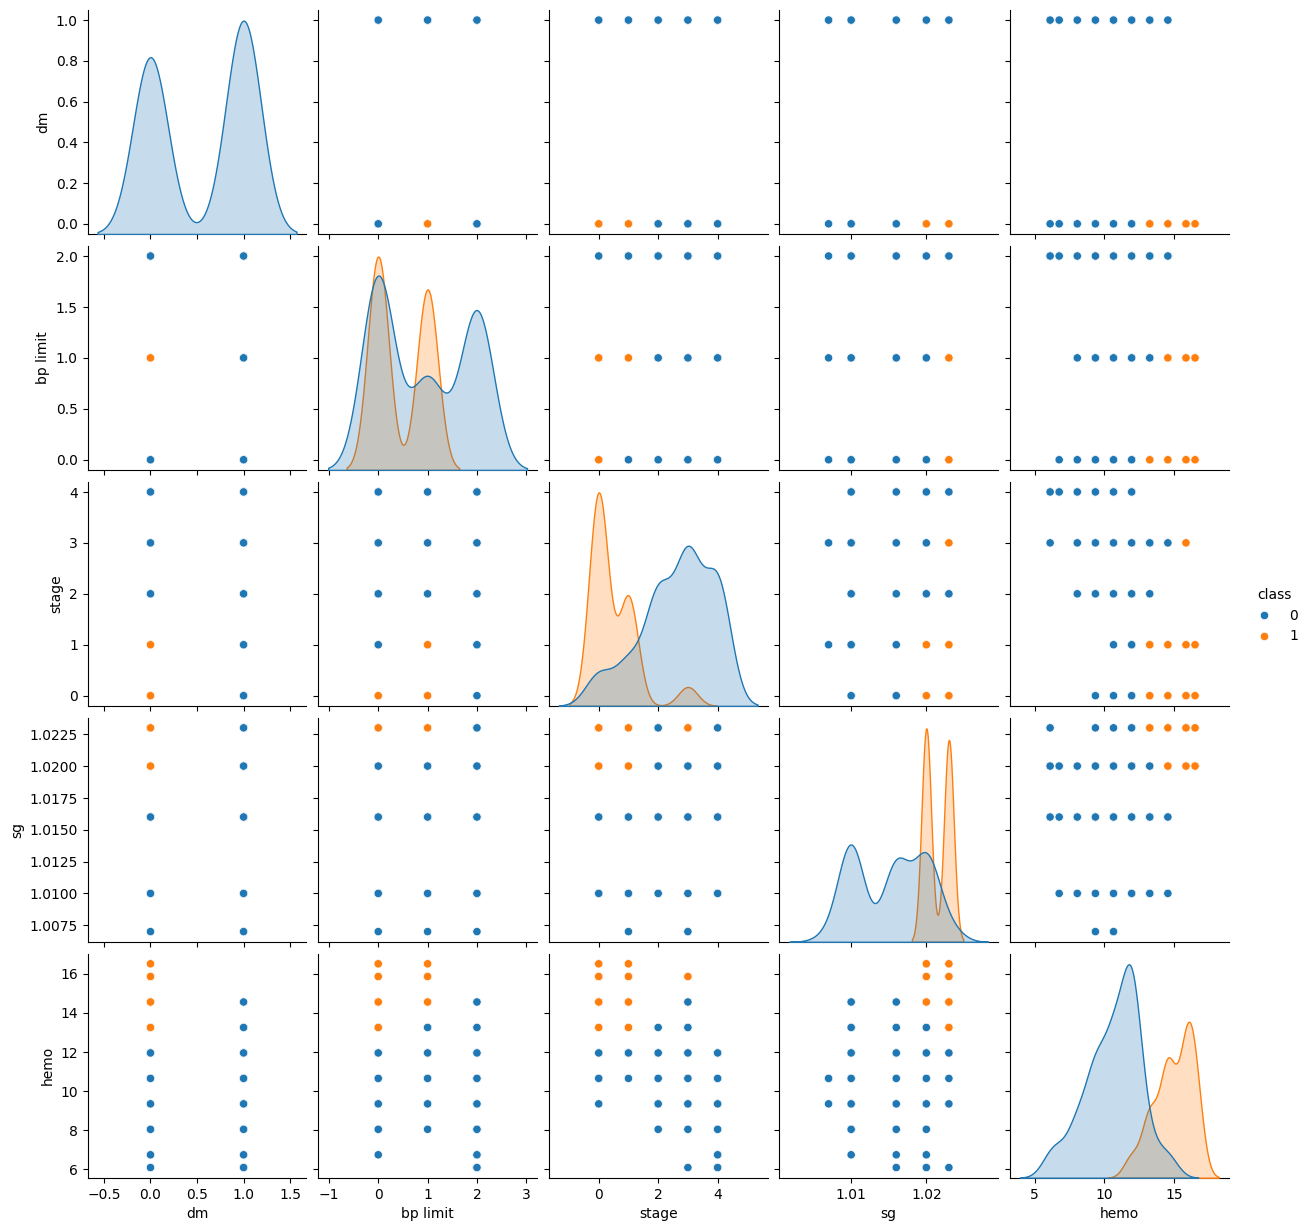

In [ ]:
columns_to_plot = ['dm', 'bp limit', 'stage', 'sg', 'hemo', 'class']
df_subset = df[columns_to_plot]

sns.pairplot(df_subset, diag_kind='kde', hue="class")


plt.show()

This function performs classification using Naive Bayes and Logistic Regression on selected important features extracted from prior analysis. It includes:

**Feature Selection:**
        The top 5 features with the highest importance (as determined earlier) are selected for classification.

**Train-Test Split:**
        The data is split into training and testing sets using a customizable test size.

**Model Training:**
        Two models, Gaussian Naive Bayes and Logistic Regression, are trained on the selected features.

**Model Evaluation:**
        Metrics such as accuracy, classification report, confusion matrix, and AUC-ROC scores (for binary classification) are calculated.
        Confusion matrices are visualized using heatmaps, and ROC curves are plotted for probabilistic models.

**Output:**
        The trained models and their test accuracies are returned.
        The accuracy scores for each model are printed for comparison.

This approach enables performance comparison between Naive Bayes and Logistic Regression on the selected features while providing detailed insights into classification performance.

Selected Features for Classification: ['dm', 'bp limit', 'stage', 'sg', 'hemo']

Naive Bayes Model Performance:
Training Accuracy: 0.9523809523809523
Testing Accuracy: 0.9324324324324325

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        45
           1       0.85      1.00      0.92        29

    accuracy                           0.93        74
   macro avg       0.93      0.94      0.93        74
weighted avg       0.94      0.93      0.93        74



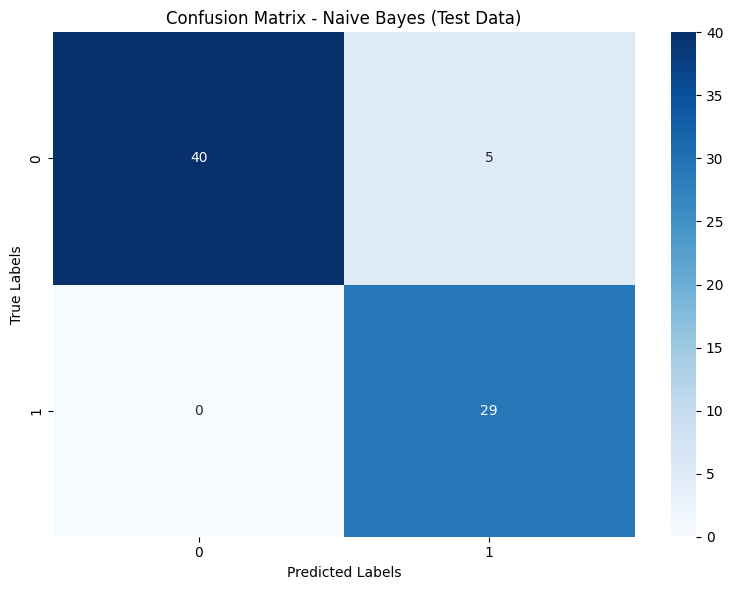

AUC-ROC Score: 0.9992


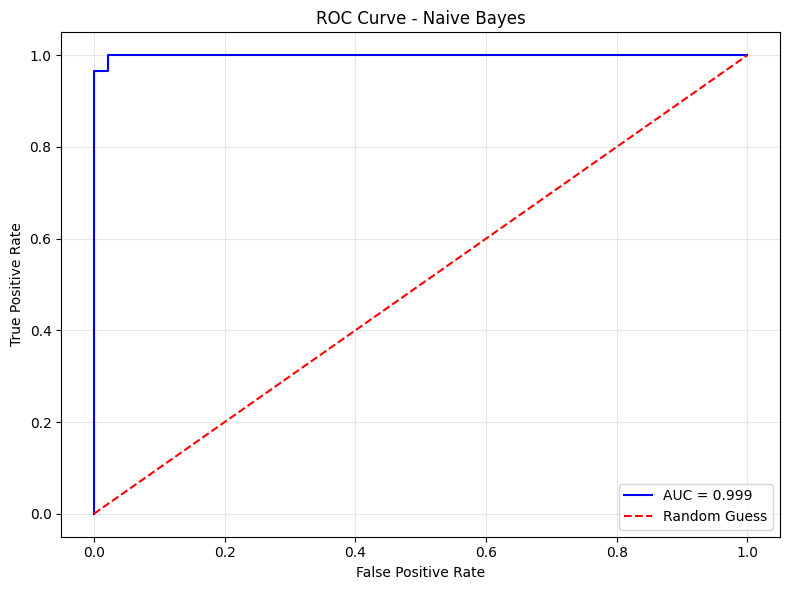


Logistic Regression Model Performance:
Training Accuracy: 0.9126984126984127
Testing Accuracy: 0.9459459459459459

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.90      0.97      0.93        29

    accuracy                           0.95        74
   macro avg       0.94      0.95      0.94        74
weighted avg       0.95      0.95      0.95        74



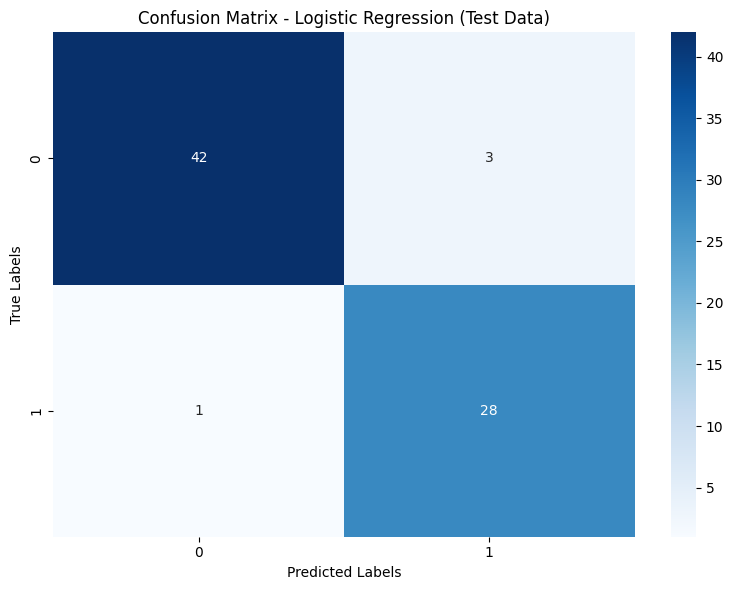

AUC-ROC Score: 0.9931


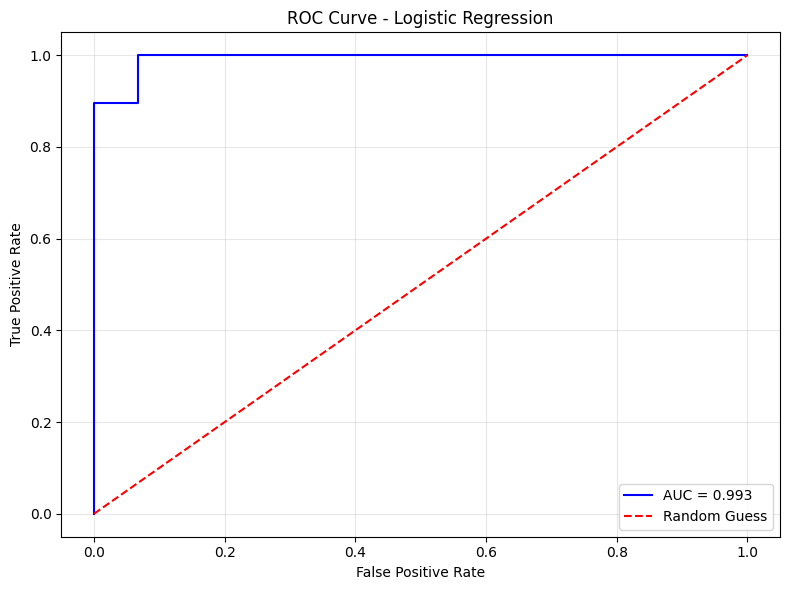


Test Accuracies:
Naive Bayes: 0.9324
Logistic Regression: 0.9459


In [ ]:

def perform_classification(df, important_features, target_col, test_size=0.37, random_state=42):
    """
    Perform classification using Naive Bayes and Logistic Regression on selected important features.
    """

    selected_features = important_features['Feature'].tail(5).tolist()
    print(f"Selected Features for Classification: {selected_features}")


    y = df[target_col]
    X = df[selected_features]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


    nb_model = GaussianNB()
    lr_model = LogisticRegression(class_weight='balanced',C=1.0, solver='liblinear',max_iter=1000)


    models = {'Naive Bayes': nb_model, 'Logistic Regression': lr_model}
    results = {}

    for name, model in models.items():

        model.fit(X_train, y_train)


        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1]


        print(f"\n{name} Model Performance:")
        print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
        print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
        print("\nClassification Report (Testing Data):")
        print(classification_report(y_test, y_pred_test))


        cm = confusion_matrix(y_test, y_pred_test)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.title(f"Confusion Matrix - {name} (Test Data)")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.tight_layout()
        plt.show()


        if len(np.unique(y)) == 2:
            auc = roc_auc_score(y_test, y_pred_prob)
            print(f"AUC-ROC Score: {auc:.4f}")


            fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.3f}')
            plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
            plt.title(f"ROC Curve - {name}")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print("AUC-ROC is not applicable for multiclass classification.")

        results[name] = accuracy_score(y_test, y_pred_test)

    return models, results



models, accuracies = perform_classification(df, feature_importance, target_col='class')

print("\nTest Accuracies:")
for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy:.4f}")


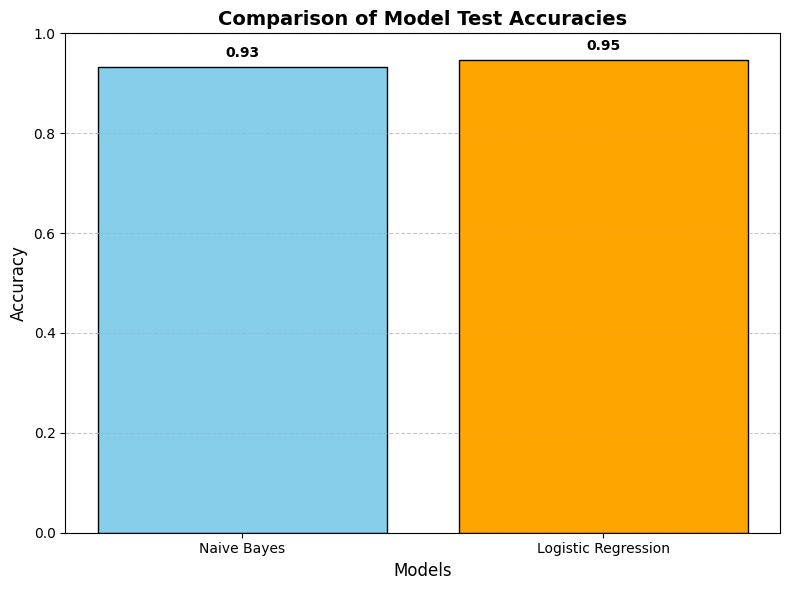

In [ ]:


def compare_model_performance(accuracies):
    """
    Compare and plot the test accuracies of Naive Bayes and Logistic Regression models.
    """
    model_names = list(accuracies.keys())
    model_accuracies = list(accuracies.values())


    plt.figure(figsize=(8, 6))
    plt.bar(model_names, model_accuracies, color=['skyblue', 'orange'], edgecolor='black')
    plt.ylim(0, 1)
    plt.title('Comparison of Model Test Accuracies', fontsize=14, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Models', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for i, acc in enumerate(model_accuracies):
        plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()


compare_model_performance(accuracies)


# **Conclusion:**

In the study of Chronic Kidney Disease (CKD) and non-CKD cases, logistic regression emerged as the better performing model compared to Naive Bayes, achieving higher accuracy and more robust classification metrics. Logistic regression effectively utilized important features such as 'hemo', 'sc', 'sg', and 'bp (Diastolic)', showcasing its ability to handle correlated features and provide interpretable insights.

To address class imbalance, SMOTE was applied, generating synthetic samples for the minority class, resulting in a balanced dataset. This ensured the models could capture meaningful patterns and improve predictions for CKD cases.

Naive Bayes, while computationally efficient, was limited by its assumption of feature independence, which may not hold true in complex datasets like CKD. In contrast, logistic regression provided better separation between CKD and non-CKD classes.

The results demonstrate that logistic regression is a reliable and interpretable model for CKD prediction, making it a valuable tool for early detection and management of CKD, thereby supporting improved healthcare outcomes.